Importing necessary Libraries

In [78]:
import os
import pandas as pd
from collections import Counter
from bisect import bisect_left

import matplotlib.colors as mcolors

import numpy as np
import matplotlib.pyplot as plt
os.getcwd()

'd:\\_MISC\\adhaar_data'

Combining all three enrollment csv files into single dataframe

In [79]:
# Get all csv files from api_data_aadhar_enrolment directory
csv_files = [f for f in os.listdir('api_data_aadhar_enrolment') if f.endswith('.csv')]

# Read and combine all csv files
dfs = [pd.read_csv(os.path.join('api_data_aadhar_enrolment', file)) for file in csv_files]
df = pd.concat(dfs, ignore_index=True)

# Save combined dataframe to csv
# df.to_csv('try.csv', index=False)
print(f'Combined {len(csv_files)} files into single dataframe')
print(df.shape)

Combined 3 files into single dataframe
(1006029, 7)


Check Data-Types

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


In [81]:
df.nunique()

date                 92
state                55
district            985
pincode           19463
age_0_5             671
age_5_17            624
age_18_greater      199
dtype: int64

Convert date column to datetime format and add Month Column

In [82]:
df['date'] = pd.to_datetime(df['date'],format = "%d-%m-%Y")

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   date            1006029 non-null  datetime64[ns]
 1   state           1006029 non-null  object        
 2   district        1006029 non-null  object        
 3   pincode         1006029 non-null  int64         
 4   age_0_5         1006029 non-null  int64         
 5   age_5_17        1006029 non-null  int64         
 6   age_18_greater  1006029 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 53.7+ MB


Checking state column for cleaning

In [84]:
df['state'].value_counts()

state
Uttar Pradesh                                   110369
Tamil Nadu                                       92552
Maharashtra                                      77191
West Bengal                                      76519
Karnataka                                        70198
Andhra Pradesh                                   65658
Bihar                                            60567
Rajasthan                                        56159
Madhya Pradesh                                   50225
Gujarat                                          46624
Odisha                                           43691
Telangana                                        42774
Kerala                                           39145
Assam                                            31827
Jharkhand                                        23218
Punjab                                           20439
Chhattisgarh                                     18550
Haryana                                          15997
Jamm

Removing Garbage Columns

In [85]:
df = df[df['state'] != "100000"]
print(df.shape)

(1006007, 7)


Checking For spelling Mistakes

In [86]:
print('Total unique values in state column :',len(df['state'].unique()))
sorted(df['state'].unique())

Total unique values in state column : 54


['Andaman & Nicobar Islands',
 'Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra & Nagar Haveli',
 'Dadra and Nagar Haveli',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Daman & Diu',
 'Daman and Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jammu And Kashmir',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'ODISHA',
 'Odisha',
 'Orissa',
 'Pondicherry',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'The Dadra And Nagar Haveli And Daman And Diu',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'WEST BENGAL',
 'WESTBENGAL',
 'West  Bengal',
 'West Bangal',
 'West Bengal',
 'West bengal',
 'Westbengal',
 'andhra pradesh']

Replacing All Spelling Mistakes

In [87]:
df['state'] = df['state'].replace('Andaman and Nicobar Islands', 'Andaman & Nicobar Islands')
df['state'] = df['state'].replace('andhra pradesh', 'Andhra Pradesh')
df['state'] = df['state'].replace('Dadra and Nagar Haveli', 'Dadra & Nagar Haveli')
df['state'] = df['state'].replace('Daman and Diu', 'Daman & Diu')
df['state'] = df['state'].replace('The Dadra And Nagar Haveli And Daman And Diu', 'Dadra & Nagar Haveli and Daman & Diu')
df['state'] = df['state'].replace('Dadra and Nagar Haveli and Daman and Diu', 'Dadra & Nagar Haveli and Daman & Diu')
df['state'] = df['state'].replace('Jammu And Kashmir', 'Jammu & Kashmir')
df['state'] = df['state'].replace('Jammu and Kashmir', 'Jammu & Kashmir')
df['state'] = df['state'].replace('ODISHA', 'Odisha')
df['state'] = df['state'].replace('Orissa', 'Odisha')
df['state'] = df['state'].replace('Pondicherry', 'Puducherry')
df['state'] = df['state'].replace('Westbengal', 'West Bengal')
df['state'] = df['state'].replace('West bengal', 'West Bengal')
df['state'] = df['state'].replace('West Bangal', 'West Bengal')
df['state'] = df['state'].replace('West  Bengal', 'West Bengal')
df['state'] = df['state'].replace('WESTBENGAL', 'West Bengal')
df['state'] = df['state'].replace('WEST BENGAL', 'West Bengal')

Verifying Corrections

In [88]:
sorted(df['state'].unique())

['Andaman & Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra & Nagar Haveli',
 'Dadra & Nagar Haveli and Daman & Diu',
 'Daman & Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [89]:
sorted(df[df['state']=='Uttarakhand']['district'].unique())
# We can Spot Hardwar and Haridwar

['Almora',
 'Bageshwar',
 'Chamoli',
 'Champawat',
 'Dehradun',
 'Garhwal',
 'Hardwar',
 'Haridwar',
 'Nainital',
 'Pauri Garhwal',
 'Pithoragarh',
 'Rudraprayag',
 'Tehri Garhwal',
 'Udham Singh Nagar',
 'Uttarkashi']

In [90]:
'''
However we were able to correct the states manually with ease, 
we realised that doing so for every district is not a feasible solution.
Instead, we went on to find a pin-code database 
which can be used to reverse map the state and district name using pincode column.
'''

'\nHowever we were able to correct the states manually with ease, \nwe realised that doing so for every district is not a feasible solution.\nInstead, we went on to find a pin-code database \nwhich can be used to reverse map the state and district name using pincode column.\n'

Gathering Pin-code Data

In [91]:
# Pincode data taken from
# https://www.data.gov.in/resource/all-india-pincode-directory-till-last-month

#Extracted all Pincodes and respective [district,statename]
pin_df = pd.read_csv('./pin_code_data.csv')
# Extract unique pincode to [district, statename] mapping
pincode_mapping = pin_df[['pincode', 'district', 'statename']].dropna().drop_duplicates(subset=['pincode']).set_index('pincode')[['district', 'statename']].to_dict('index')
print(len(pincode_mapping))
print(pincode_mapping[811315])

19486
{'district': 'JAMUI', 'statename': 'BIHAR'}


Find all pincodes that are present in our data but not in pincode_mapping

In [92]:
s1 = set(df['pincode'].unique())
s2 = set(pincode_mapping.keys())
needed_pins = sorted(s1.difference(s2))
print(len(needed_pins))
print(needed_pins)

822
[121705, 127110, 133021, 133105, 134011, 134115, 141017, 141124, 142028, 143003, 143026, 143104, 143110, 144004, 144011, 144012, 144013, 144014, 144203, 147506, 171302, 171303, 171304, 173020, 173028, 173216, 173219, 174401, 174402, 174403, 175122, 175137, 176120, 176121, 176122, 176123, 176126, 176213, 176219, 182117, 185111, 191123, 192102, 192306, 193198, 193202, 194403, 194404, 201308, 202389, 202390, 202391, 202392, 202393, 202394, 202395, 202396, 202397, 202398, 202399, 202410, 202411, 202412, 202413, 202414, 202415, 202421, 202520, 202521, 202522, 202523, 202524, 202525, 202526, 202527, 205130, 205135, 205141, 205142, 205145, 205147, 205151, 205152, 205302, 206301, 206302, 206303, 206451, 207501, 207502, 207503, 207504, 207505, 209201, 209506, 209715, 210010, 211009, 212210, 212623, 212660, 212662, 212666, 215126, 216221, 221209, 221210, 222101, 222102, 222103, 222107, 222108, 222110, 222111, 222112, 222113, 223106, 223107, 224166, 225002, 225402, 225406, 225407, 225408, 225

Use 3-Nearest Neighbors and 1-Nearest Neighbors to fill the missing data

In [93]:
left_pincode_mapping = {}
keys = sorted(pincode_mapping.keys())
n = len(keys)
_1nncount,_3nncount=0,0
for pin in needed_pins:
    pos = bisect_left(keys, pin)
    lo = max(0, pos - 3)
    hi = min(n, pos + 3)
    candidate_keys = keys[lo:hi]
    nearest = sorted(candidate_keys, key=lambda k: abs(k - pin))[:3]
    candidates = []
    for k in nearest:
        info = pincode_mapping.get(k)
        if info:
            candidates.append({
                'pincode': k,
                'statename': info.get('statename'),
                'district': info.get('district'),
                'distance': abs(k - pin)
            })
    
    # Check for majority in 3NN
    if candidates:
        state_counter = Counter(c['statename'] for c in candidates)
        district_counter = Counter(c['district'] for c in candidates)
        
        state_majority = state_counter.most_common(1)[0][1] > len(candidates) / 2
        district_majority = district_counter.most_common(1)[0][1] > len(candidates) / 2
        
        if state_majority and district_majority:
            assigned_state = state_counter.most_common(1)[0][0]
            assigned_district = district_counter.most_common(1)[0][0]
            method = '3NN'
            _3nncount+=1
        else:
            # Use 1-NN if no majority
            nearest_1nn = sorted(candidate_keys, key=lambda k: abs(k - pin))[:1]
            info = pincode_mapping.get(nearest_1nn[0])
            assigned_state = info.get('statename') if info else None
            assigned_district = info.get('district') if info else None
            method = '1NN'
            _1nncount+=1
    else:
        assigned_state = None
        assigned_district = None
        method = '1NN'
        _1nncount+=1
    
    left_pincode_mapping[pin] = {
        'method': method,
        'assigned': {'statename': assigned_state, 'district': assigned_district},
        'candidates': candidates
    }

print(f'left_pincode_mapping entries: {len(left_pincode_mapping)}')
print(f'1NN: {_1nncount} , 3NN: {_3nncount}')

left_pincode_mapping entries: 822
1NN: 20 , 3NN: 802


In [94]:
len(pincode_mapping),len(left_pincode_mapping)

(19486, 822)

In [95]:
len(set(pincode_mapping.keys()).intersection(set(left_pincode_mapping.keys())))

0

Check for any null values in statename or district in left_pincode_mapping

In [96]:
null_entries = []
for pin, data in left_pincode_mapping.items():
    assigned = data.get('assigned', {})
    if assigned.get('statename') is None or assigned.get('district') is None:
        null_entries.append({
            'pincode': pin,
            'statename': assigned.get('statename'),
            'district': assigned.get('district'),
            'method': data.get('method')
        })

print(f"Total entries with null values: {len(null_entries)}")
if null_entries:
    for entry in null_entries[:10]:  # Show first 10
        print(entry)

Total entries with null values: 0


Merge with pincode_mapping

In [97]:
for key in left_pincode_mapping:
    pincode_mapping[key] = left_pincode_mapping[key]['assigned']
len(set(pincode_mapping.keys()))

20308

Using Pin-code Data to clean State and District Columns

In [98]:
df['state_'] = df['pincode'].map(lambda x: pincode_mapping.get(x, {}).get('statename'))
df['district_'] = df['pincode'].map(lambda x: pincode_mapping.get(x, {}).get('district'))

df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,state_,district_
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,MEGHALAYA,EAST KHASI HILLS
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,KARNATAKA,BENGALURU URBAN
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,UTTAR PRADESH,KANPUR NAGAR
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,UTTAR PRADESH,ALIGARH
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,KARNATAKA,BENGALURU URBAN


Checking If it Worked

In [99]:
df.isnull().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
state_            0
district_         0
dtype: int64

In [100]:
df_null = df[df['state_'].isnull() | df['district_'].isnull()]
df_null['pincode'].value_counts()

Series([], Name: count, dtype: int64)

In [101]:
len(df['district'].unique()),len(df['district_'].unique())

(984, 740)

In [102]:
print(df[df['state']=='Uttarakhand']['district'].value_counts())
print(sum(df[df['state']=='Uttarakhand']['district'].value_counts()))
# We can Spot Hardwarand Haridwar as different, Garhwal is a region not a district


district
Dehradun             1521
Haridwar             1086
Pauri Garhwal         974
Tehri Garhwal         954
Almora                800
Udham Singh Nagar     795
Nainital              758
Pithoragarh           681
Chamoli               643
Rudraprayag           454
Uttarkashi            435
Bageshwar             417
Champawat             321
Hardwar               123
Garhwal                45
Name: count, dtype: int64
10007


In [103]:
print(df[df['state_']=='UTTARAKHAND']['district_'].value_counts())
print(sum(df[df['state_']=='UTTARAKHAND']['district_'].value_counts()))
# We can Spot Haridwar and Hardwar are merged, and Garhwal gets divided into pauri and tehri and other districts 

district_
DEHRADUN            1521
HARIDWAR            1182
PAURI GARHWAL       1019
TEHRI GARHWAL        964
UDAM SINGH NAGAR     911
ALMORA               849
PITHORAGARH          684
CHAMOLI              660
NAINITAL             607
RUDRA PRAYAG         437
BAGESHWAR            435
UTTAR KASHI          425
CHAMPAWAT            318
Name: count, dtype: int64
10012


Checking Date Range

In [104]:
min(df['date']),max(df['date'])
#All data is from 2025

(Timestamp('2025-03-02 00:00:00'), Timestamp('2025-12-31 00:00:00'))

 converting month to Month_name and adding Weekday column

In [105]:
df['Month_name'] = df['date'].dt.month_name()
df['Weekday'] = df['date'].dt.day_name()
#checking for random tuples
df.iloc[[10,34,304,1225]]

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,state_,district_,Month_name,Weekday
10,2025-03-09,Uttar Pradesh,Maharajganj,273164,31,70,13,UTTAR PRADESH,MAHARAJGANJ,March,Sunday
34,2025-03-15,Assam,Kokrajhar,783350,10,16,18,ASSAM,KOKRAJHAR,March,Saturday
304,2025-04-01,Gujarat,Porbandar,360575,205,28,24,GUJARAT,PORBANDAR,April,Tuesday
1225,2025-05-01,Meghalaya,West Garo Hills,794001,63,64,19,MEGHALAYA,WEST GARO HILLS,May,Thursday


Define Regions using states

In [106]:
#Define 6 regions mapping for Indian states
regions = {
'ANDAMAN AND NICOBAR ISLANDS':'SOUTH',
 'ANDHRA PRADESH':'SOUTH',
 'ARUNACHAL PRADESH':'NORTH-EAST',
 'ASSAM':'NORTH-EAST',
 'BIHAR':'EAST',
 'CHANDIGARH':'NORTH',
 'CHHATTISGARH':'CENTRAL',
 'DELHI':'NORTH',
 'GOA':'WEST',
 'GUJARAT':'WEST',
 'HARYANA':'NORTH',
 'HIMACHAL PRADESH':'NORTH',
 'JAMMU AND KASHMIR':'NORTH',
 'JHARKHAND':'EAST',
 'KARNATAKA':'SOUTH',
 'KERALA':'SOUTH',
 'LADAKH':'NORTH',
 'LAKSHADWEEP':'SOUTH',
 'MADHYA PRADESH':'CENTRAL',
 'MAHARASHTRA':'WEST',
 'MANIPUR':'NORTH-EAST',
 'MEGHALAYA':'NORTH-EAST',
 'MIZORAM':'NORTH-EAST',
 'NAGALAND':'NORTH-EAST',
 'ODISHA':'EAST',
 'PUDUCHERRY':'SOUTH',
 'PUNJAB':'NORTH',
 'RAJASTHAN':'NORTH',
 'SIKKIM':'NORTH-EAST',
 'TAMIL NADU':'SOUTH',
 'TELANGANA':'SOUTH',
 'THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU':'WEST',
 'TRIPURA':'NORTH-EAST',
 'UTTAR PRADESH':'NORTH',
 'UTTARAKHAND':'NORTH',
 'WEST BENGAL':'EAST'}
# Add region column based on state
df['region'] = df['state_'].map(regions)
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,state_,district_,Month_name,Weekday,region
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,MEGHALAYA,EAST KHASI HILLS,March,Sunday,NORTH-EAST
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,KARNATAKA,BENGALURU URBAN,March,Sunday,SOUTH
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,UTTAR PRADESH,KANPUR NAGAR,March,Sunday,NORTH
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,UTTAR PRADESH,ALIGARH,March,Sunday,NORTH
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,KARNATAKA,BENGALURU URBAN,March,Sunday,SOUTH


Add a total column

In [107]:
df['total']=df['age_0_5']+df['age_5_17']+df['age_18_greater']

drop the old district and state columns

In [108]:
df = df.drop(columns=['state', 'district'])
df = df[['date', 'Month_name', 'Weekday', 'state_', 'district_', 'pincode','region', 'age_0_5', 'age_5_17', 'age_18_greater','total']]
df.iloc[[10,34,304,1225]]

,date,Month_name,Weekday,state_,district_,pincode,region,age_0_5,age_5_17,age_18_greater,total
10,2025-03-09,March,Sunday,UTTAR PRADESH,MAHARAJGANJ,273164,NORTH,31,70,13,114
34,2025-03-15,March,Saturday,ASSAM,KOKRAJHAR,783350,NORTH-EAST,10,16,18,44
304,2025-04-01,April,Tuesday,GUJARAT,PORBANDAR,360575,WEST,205,28,24,257
1225,2025-05-01,May,Thursday,MEGHALAYA,WEST GARO HILLS,794001,NORTH-EAST,63,64,19,146


In [109]:
df.shape

(1006007, 11)

In [110]:
df.isnull().sum()

date              0
Month_name        0
Weekday           0
state_            0
district_         0
pincode           0
region            0
age_0_5           0
age_5_17          0
age_18_greater    0
total             0
dtype: int64

Now that cleaning is done, we can use the data for Exploratory Analysis

In [111]:
df.nunique()

date                 92
Month_name            9
Weekday               7
state_               36
district_           740
pincode           19462
region                6
age_0_5             671
age_5_17            624
age_18_greater      199
total              1028
dtype: int64

In [112]:
numeric = df[['age_0_5','age_5_17','age_18_greater','total']]
# print(numeric.describe().to_string(float_format='{:,.3f}'.format))
print('Mean\n',numeric.mean().to_string(float_format='{:,.3f}'.format),"\n")
print('Median\n',numeric.median().to_string(float_format='{:,.3f}'.format),"\n")
print('Min\n',numeric.min().to_string(float_format='{:,.3f}'.format),"\n")
print('Max\n',numeric.max().to_string(float_format='{:,.3f}'.format),"\n")


Mean
 age_0_5          3.526
age_5_17         1.710
age_18_greater   0.167
total            5.403 

Median
 age_0_5          2.000
age_5_17         0.000
age_18_greater   0.000
total            2.000 

Min
 age_0_5           0
age_5_17          0
age_18_greater    0
total             1 

Max
 age_0_5           2688
age_5_17          1812
age_18_greater     855
total             3965 



# Time/Day based Trend-Analysis

In [113]:
df['Weekday'].value_counts()

Weekday
Monday       189083
Wednesday    165235
Tuesday      142259
Friday       138015
Saturday     131093
Thursday     130090
Sunday       110232
Name: count, dtype: int64

Checking which weekdays have most enrollments

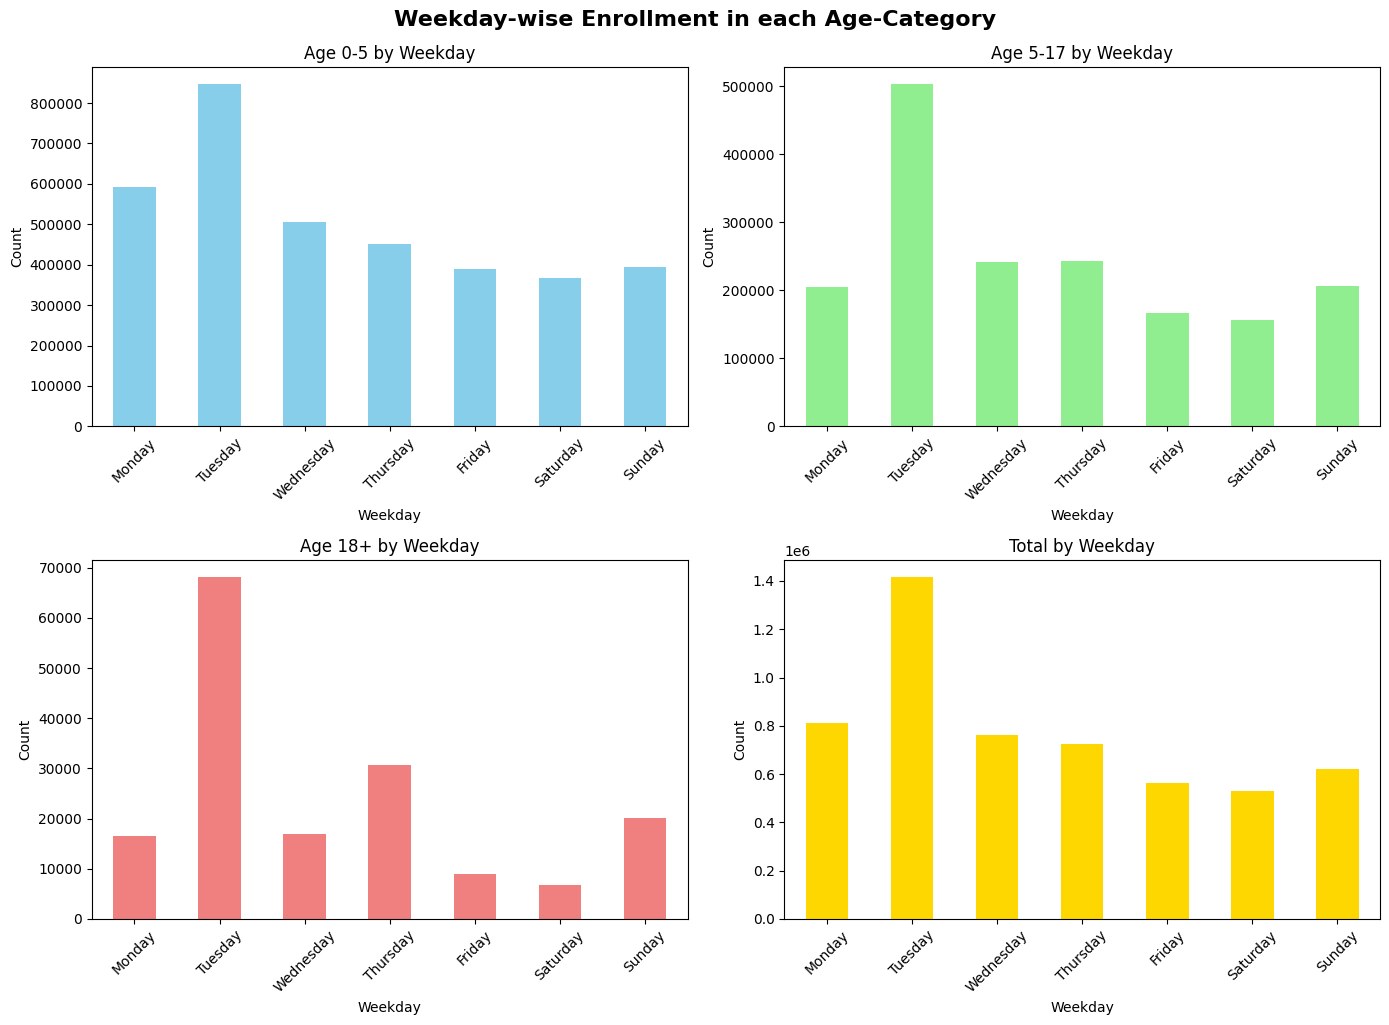

           age_0_5  age_5_17  age_18_greater    total
Weekday                                              
Monday      592101    204625           16617   813343
Tuesday     846112    502400           68178  1416690
Wednesday   504680    241945           16923   763548
Thursday    451647    242745           30731   725123
Friday      389705    165910            8963   564578
Saturday    367207    156792            6692   530691
Sunday      395513    205966           20032   621511


In [114]:
# Group by weekday and sum all age groups
weekday_grouped = df.groupby('Weekday')[['age_0_5', 'age_5_17', 'age_18_greater', 'total']].sum()

# Reorder by day of week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_grouped = weekday_grouped.reindex(weekday_order)

# Create comparative bar graphs
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

weekday_grouped['age_0_5'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age 0-5 by Weekday')
axes[0, 0].set_ylabel('Count')

weekday_grouped['age_5_17'].plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Age 5-17 by Weekday')
axes[0, 1].set_ylabel('Count')

weekday_grouped['age_18_greater'].plot(kind='bar', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Age 18+ by Weekday')
axes[1, 0].set_ylabel('Count')

weekday_grouped['total'].plot(kind='bar', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Total by Weekday')
axes[1, 1].set_ylabel('Count')

for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
fig.suptitle('Weekday-wise Enrollment in each Age-Category', fontsize=16, fontweight='bold', y=1.02)
plt.show()

print(weekday_grouped)

MonthWise Analysis

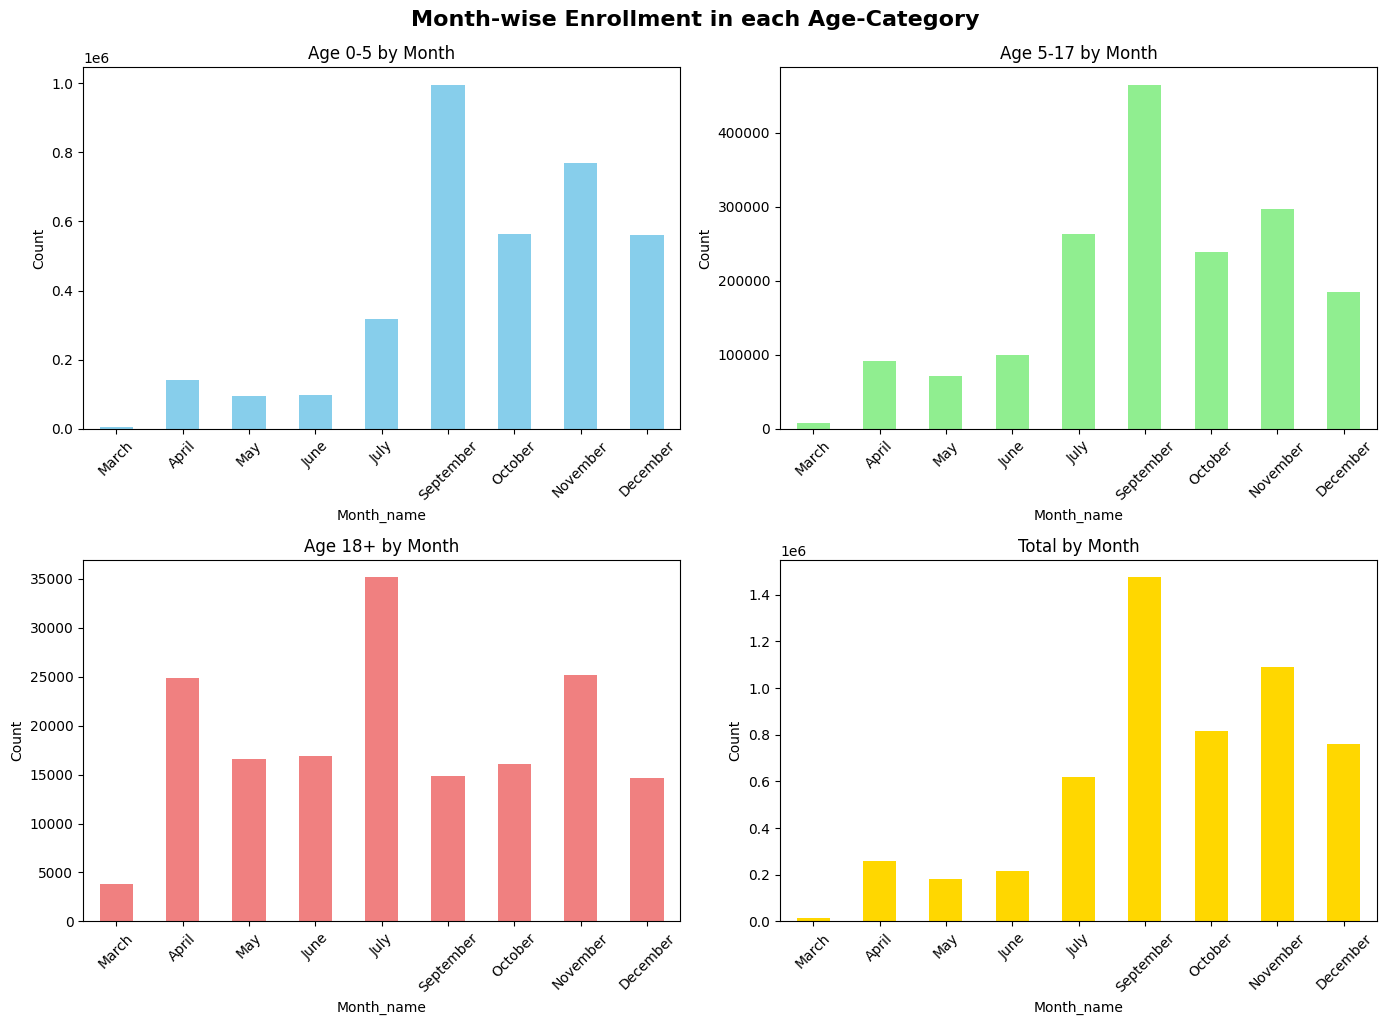

            age_0_5  age_5_17  age_18_greater    total
Month_name                                            
March          5367      7407            3808    16582
April        141154     91371           24913   257438
May           95342     71690           16584   183616
June          98943     99911           16880   215734
July         318352    263333           35183   616868
September    995612    465401           14854  1475867
October      562856    238957           16106   817919
November     769156    297658           25182  1091996
December     560183    184655           14626   759464


In [115]:
# Group by month and sum all age groups
month_grouped = df.groupby('Month_name')[['age_0_5', 'age_5_17', 'age_18_greater', 'total']].sum()

# Reorder by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
month_grouped = month_grouped.reindex([m for m in month_order if m in month_grouped.index])

# Create comparative bar graphs
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

month_grouped['age_0_5'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age 0-5 by Month')
axes[0, 0].set_ylabel('Count')

month_grouped['age_5_17'].plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Age 5-17 by Month')
axes[0, 1].set_ylabel('Count')

month_grouped['age_18_greater'].plot(kind='bar', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Age 18+ by Month')
axes[1, 0].set_ylabel('Count')

month_grouped['total'].plot(kind='bar', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Total by Month')
axes[1, 1].set_ylabel('Count')

for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
fig.suptitle('Month-wise Enrollment in each Age-Category', fontsize=16, fontweight='bold', y=1.02)

plt.show()

print(month_grouped)

Month over Month Growth rate

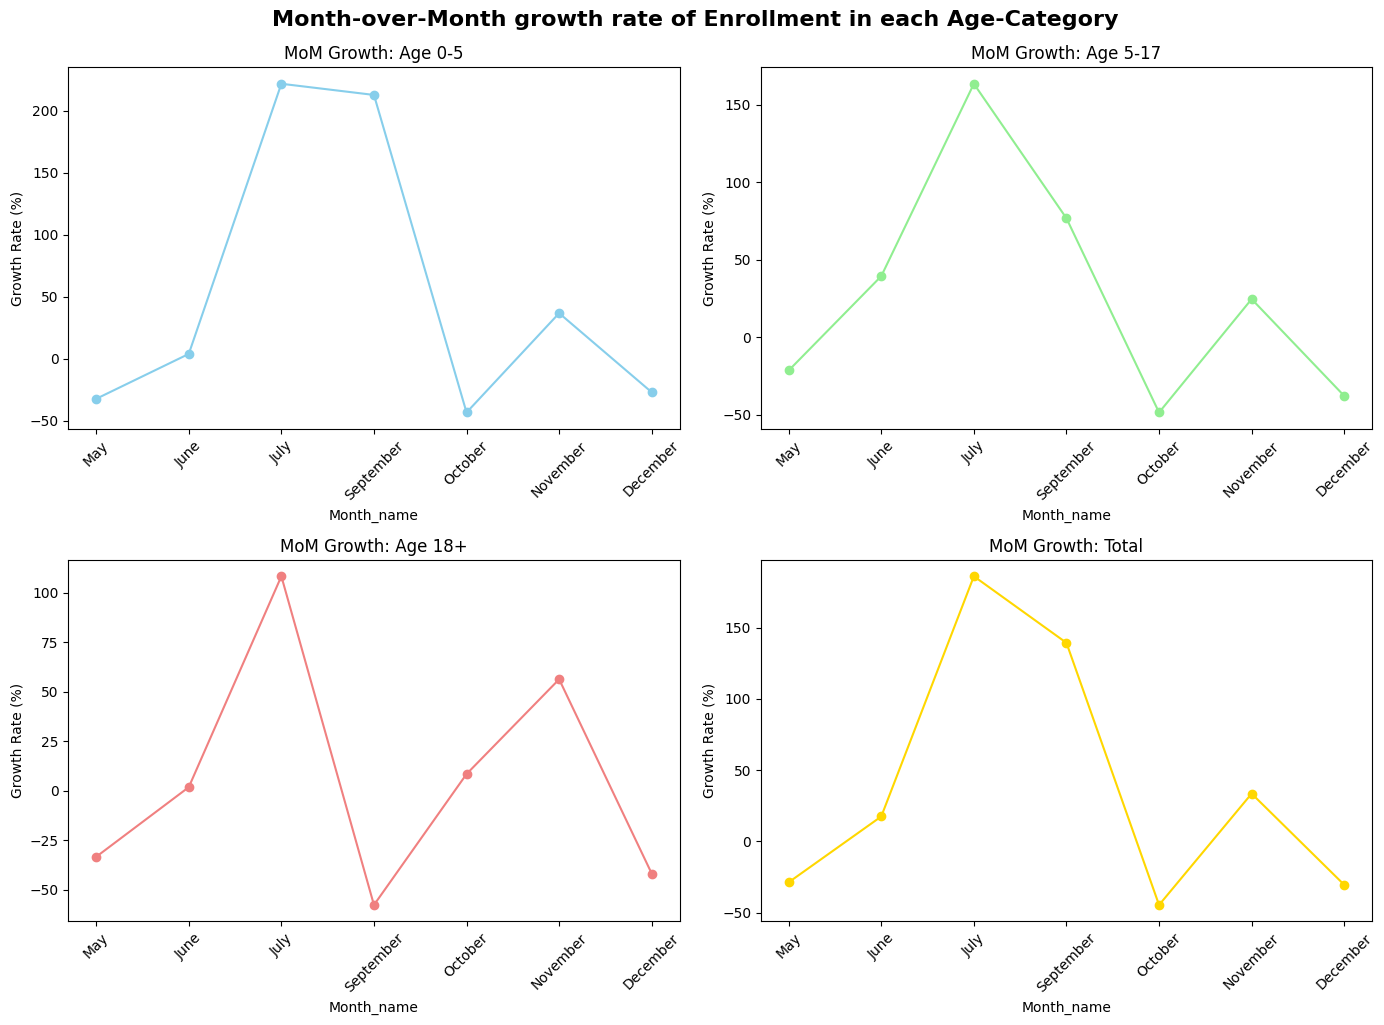

               age_0_5    age_5_17  age_18_greater       total
Month_name                                                    
May         -32.455332  -21.539657      -33.432345  -28.675642
June          3.776929   39.365323        1.784853   17.491940
July        221.752928  163.567575      108.430095  185.939166
September   212.739358   76.734781      -57.780746  139.251671
October     -43.466330  -48.655675        8.428706  -44.580440
November     36.652359   24.565508       56.351670   33.509064
December    -27.169131  -37.964039      -41.918831  -30.451760


In [116]:
# Calculate MoM growth rate (%)
# month_growth = month_grouped.pct_change() * 100
month_growth = month_grouped.pct_change().iloc[2:] * 100

# Create line plots with SAME colors as original code
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

month_growth['age_0_5'].plot(ax=axes[0, 0], color='skyblue', marker='o')
axes[0, 0].set_title('MoM Growth: Age 0-5')
axes[0, 0].set_ylabel('Growth Rate (%)')

month_growth['age_5_17'].plot(ax=axes[0, 1], color='lightgreen', marker='o')
axes[0, 1].set_title('MoM Growth: Age 5-17')
axes[0, 1].set_ylabel('Growth Rate (%)')

month_growth['age_18_greater'].plot(ax=axes[1, 0], color='lightcoral', marker='o')
axes[1, 0].set_title('MoM Growth: Age 18+')
axes[1, 0].set_ylabel('Growth Rate (%)')

month_growth['total'].plot(ax=axes[1, 1], color='gold', marker='o')
axes[1, 1].set_title('MoM Growth: Total')
axes[1, 1].set_ylabel('Growth Rate (%)')

for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
fig.suptitle('Month-over-Month growth rate of Enrollment in each Age-Category', fontsize=16, fontweight='bold', y=1.02)
plt.show()

print(month_growth)


Date-Wise ( ascending )

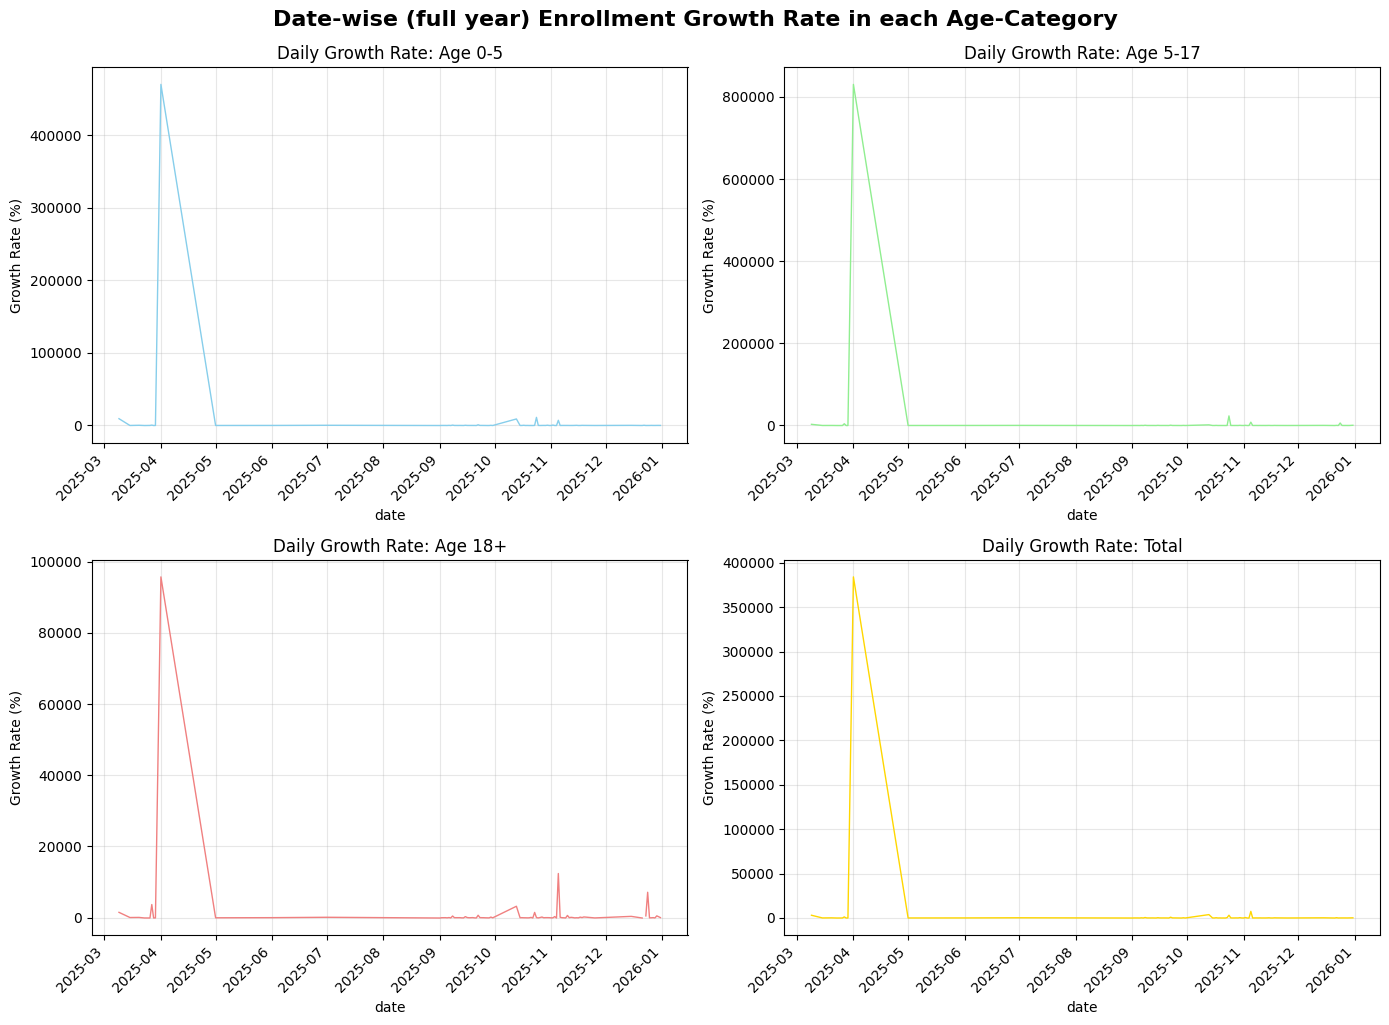

                  age_0_5       age_5_17  age_18_greater          total
date                                                                   
2025-03-09    9327.272727    2813.114754     1494.594595    3022.935780
2025-03-15     -31.533269     -12.155318       40.847458      -8.871915
2025-03-20     222.676056      62.267777       67.749699     100.451322
2025-03-23     -93.976430     -89.774970      -87.159254     -90.736571
2025-03-26      21.739130     -89.961390      -90.502793     -63.368056
2025-03-27     458.928571    4211.538462     3688.235294    1181.516588
2025-03-28     -95.420660     -94.826048      -86.024845     -92.936391
2025-03-29     -30.232558     -81.034483      -71.111111     -64.921466
2025-04-01  470413.333333  830545.454545    95719.230769  384135.820896
2025-05-01     -32.455332     -21.539657      -33.432345     -28.675642


In [117]:
# Group by date and sum all age groups
daily_grouped = df.groupby('date')[['age_0_5', 'age_5_17', 'age_18_greater', 'total']].sum()

# Calculate daily growth rate (%)
daily_growth = daily_grouped.pct_change().iloc[1:] * 100

# Create line plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

daily_growth['age_0_5'].plot(ax=axes[0, 0], color='skyblue', linewidth=1)
axes[0, 0].set_title('Daily Growth Rate: Age 0-5')
axes[0, 0].set_ylabel('Growth Rate (%)')
axes[0, 0].grid(True, alpha=0.3)

daily_growth['age_5_17'].plot(ax=axes[0, 1], color='lightgreen', linewidth=1)
axes[0, 1].set_title('Daily Growth Rate: Age 5-17')
axes[0, 1].set_ylabel('Growth Rate (%)')
axes[0, 1].grid(True, alpha=0.3)

daily_growth['age_18_greater'].plot(ax=axes[1, 0], color='lightcoral', linewidth=1)
axes[1, 0].set_title('Daily Growth Rate: Age 18+')
axes[1, 0].set_ylabel('Growth Rate (%)')
axes[1, 0].grid(True, alpha=0.3)

daily_growth['total'].plot(ax=axes[1, 1], color='gold', linewidth=1)
axes[1, 1].set_title('Daily Growth Rate: Total')
axes[1, 1].set_ylabel('Growth Rate (%)')
axes[1, 1].grid(True, alpha=0.3)

for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
fig.suptitle('Date-wise (full year) Enrollment Growth Rate in each Age-Category', fontsize=16, fontweight='bold', y=1.02)

plt.show()

print(daily_growth.head(10))

Day-Wise (0-31)

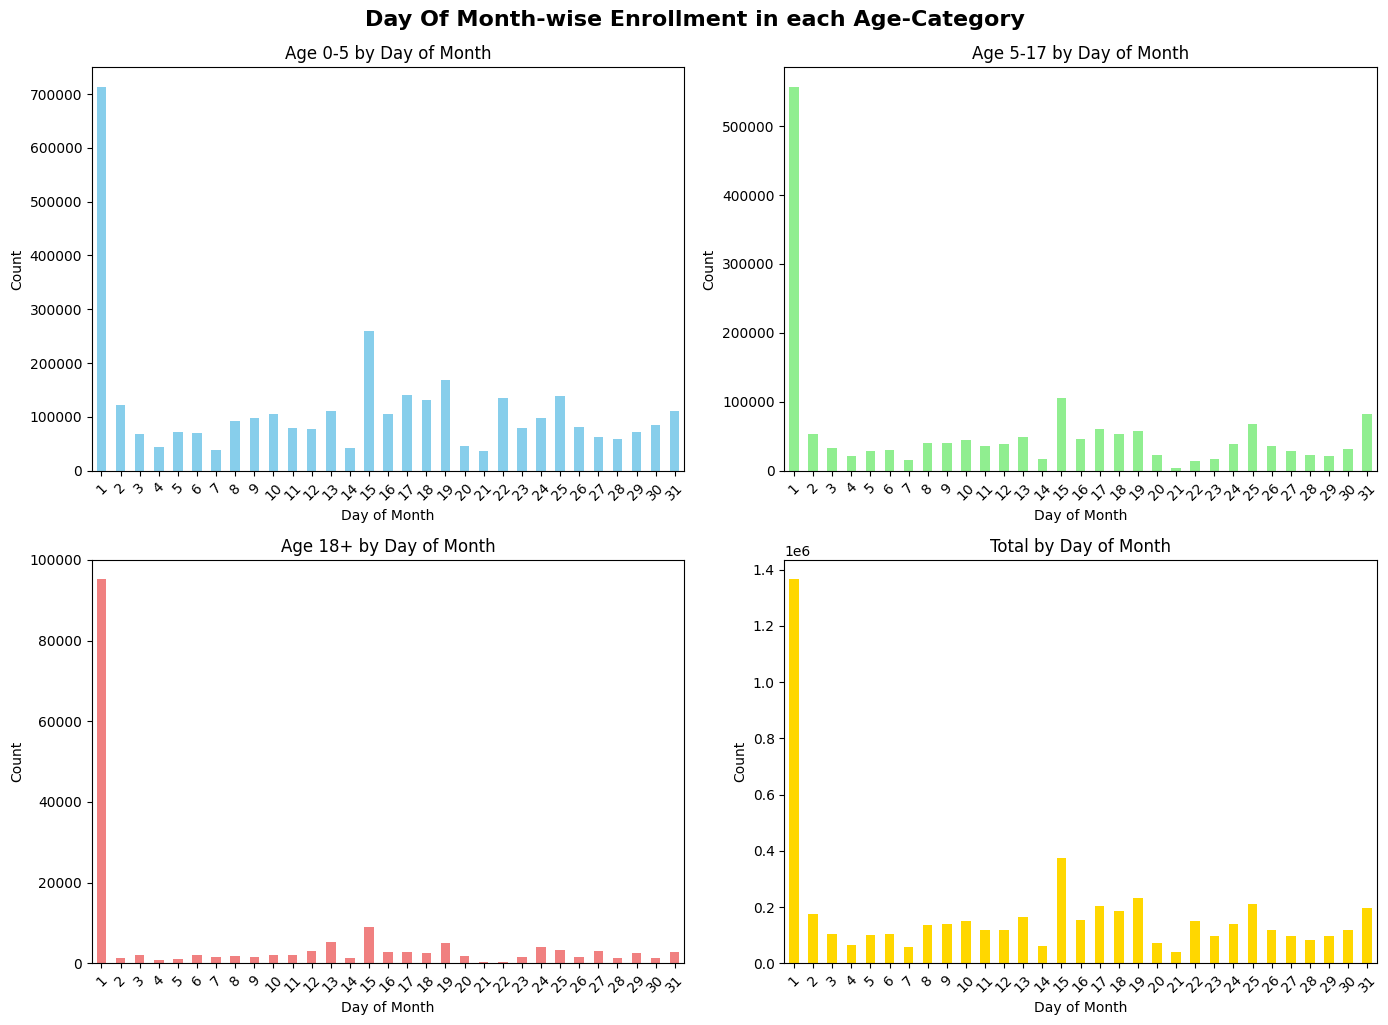

      age_0_5  age_5_17  age_18_greater    total
date                                            
1      713903    557337           95254  1366494
2      122401     52971            1301   176673
3       68756     32638            2125   103519
4       43793     21728             835    66356
5       71641     28840            1181   101662
6       69673     30799            2070   102542
7       39294     16112            1582    56988
8       93401     40541            1801   135743
9       97778     40729            1623   140130
10     104645     44524            2116   151285
11      79384     35848            2005   117237
12      77953     38268            3133   119354
13     110495     48285            5326   164106
14      42917     16996            1342    61255
15     259039    106079            9094   374212
16     105341     46679            2760   154780
17     141113     60048            2813   203974
18     131023     53382            2641   187046
19     168070     58

In [118]:
# Group by day of month and sum all age groups
day_grouped = df.groupby(df['date'].dt.day)[['age_0_5', 'age_5_17', 'age_18_greater', 'total']].sum()

# Create comparative bar graphs
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

day_grouped['age_0_5'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age 0-5 by Day of Month')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xlabel('Day of Month')

day_grouped['age_5_17'].plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Age 5-17 by Day of Month')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xlabel('Day of Month')

day_grouped['age_18_greater'].plot(kind='bar', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Age 18+ by Day of Month')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xlabel('Day of Month')

day_grouped['total'].plot(kind='bar', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Total by Day of Month')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xlabel('Day of Month')

for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
fig.suptitle('Day Of Month-wise Enrollment in each Age-Category', fontsize=16, fontweight='bold', y=1.02)

plt.show()

print(day_grouped)

# Geographical Analysis

State-Wise Grouping

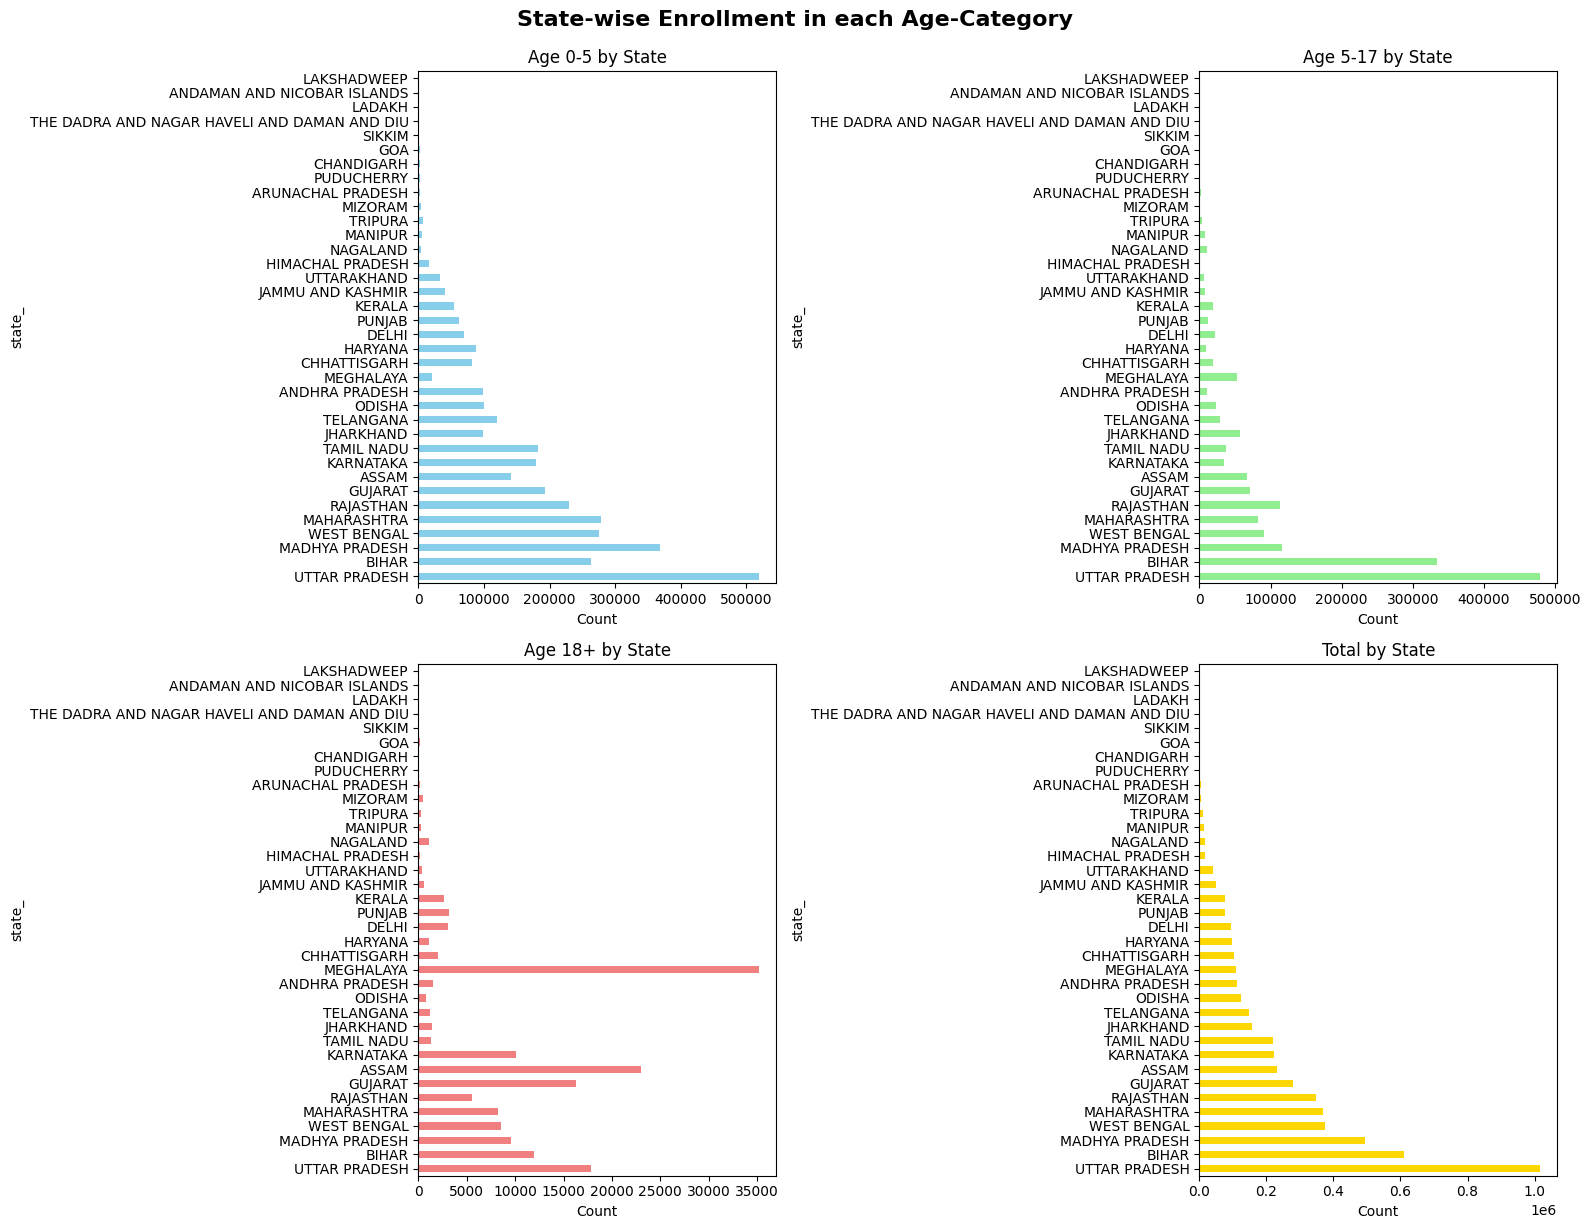

                                              age_0_5  age_5_17  \
state_                                                            
UTTAR PRADESH                                  519607    479018   
BIHAR                                          262840    334768   
MADHYA PRADESH                                 367990    116381   
WEST BENGAL                                    275418     91406   
MAHARASHTRA                                    278814     82116   
RAJASTHAN                                      229464    112827   
GUJARAT                                        192909     71157   
ASSAM                                          141198     66253   
KARNATAKA                                      179262     33863   
TAMIL NADU                                     182341     37226   
JHARKHAND                                       98586     57573   
TELANGANA                                      119791     28340   
ODISHA                                          99433     2281

In [119]:
# Group by state and sum all age groups
state_grouped = df.groupby('state_')[['age_0_5', 'age_5_17', 'age_18_greater', 'total']].sum().sort_values('total', ascending=False)

# Create comparative bar graphs
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

state_grouped['age_0_5'].plot(kind='barh', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age 0-5 by State')
axes[0, 0].set_xlabel('Count')

state_grouped['age_5_17'].plot(kind='barh', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Age 5-17 by State')
axes[0, 1].set_xlabel('Count')

state_grouped['age_18_greater'].plot(kind='barh', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Age 18+ by State')
axes[1, 0].set_xlabel('Count')

state_grouped['total'].plot(kind='barh', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Total by State')
axes[1, 1].set_xlabel('Count')

plt.tight_layout()
fig.suptitle('State-wise Enrollment in each Age-Category', fontsize=16, fontweight='bold', y=1.02)

plt.show()

print(state_grouped)

In [120]:
cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'total']
base_colors = {
    'age_0_5': 'skyblue',
    'age_5_17': 'lightgreen',
    'age_18_greater': 'lightcoral',
    'total': 'gold'
}
rename = {
    'age_0_5': 'Age 0-5',
    'age_5_17': 'Age 5-17',
    'age_18_greater': 'Age 18+',
    'total': 'Total'
}

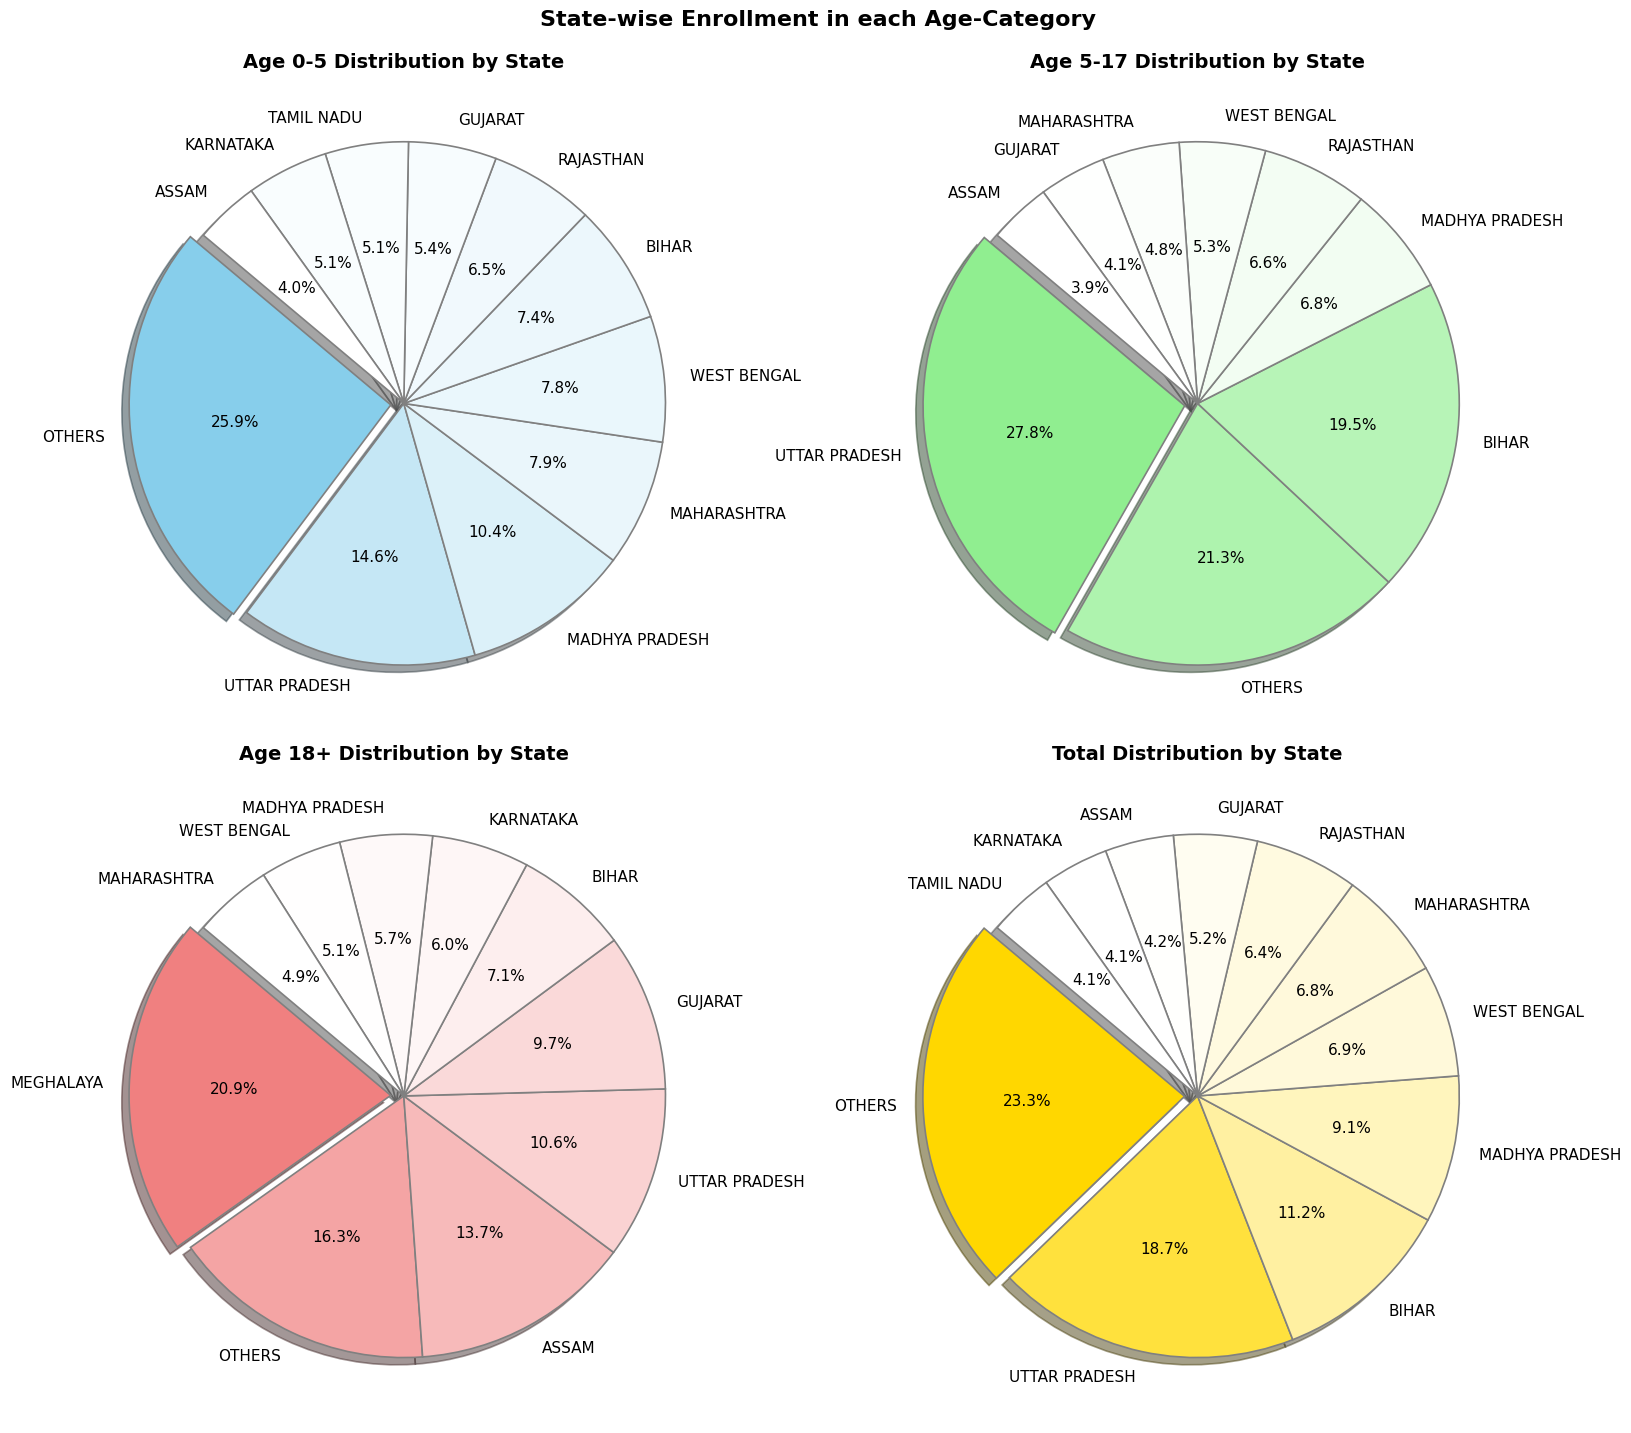

In [121]:


threshold_pct = 3.5  # Values below 3.5% go to OTHERS

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for ax, col in zip(axes.flat, cols):
    values = state_grouped[col]
    total_sum = values.sum()

    # Split major vs negligible
    major = values[values / total_sum * 100 >= threshold_pct]
    others = values[values / total_sum * 100 < threshold_pct].sum()
    if others > 0:
        major = pd.concat([major, pd.Series({'OTHERS': others})])

    major = major.sort_values(ascending=False)
    
    # Explode largest slice slightly
    explode = [0.05 if v == major.max() else 0 for v in major]

    # Create color shades: darker for higher %, lighter for lower %
    norm = mcolors.Normalize(vmin=major.min(), vmax=major.max())
    cmap = mcolors.LinearSegmentedColormap.from_list('shade', ['white', base_colors[col]])
    colors = [cmap(norm(v)) for v in major]

    # Plot pie
    ax.pie(
        major.values,
        labels=major.index,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'gray', 'linewidth': 1.2},
        textprops={'fontsize': 11}
    )
    ax.set_title(f"{rename[col]} Distribution by State", fontsize=14, weight='bold')

plt.tight_layout()
fig.suptitle('State-wise Enrollment in each Age-Category', fontsize=16, fontweight='bold', y=1.02)
plt.show()


We Can see unusual spikes in Meghalaya and Assam in >18 age group despite Small Populations overall, which needs to be studied further.

In [122]:
meghalaya = df[df['state_']=="MEGHALAYA"]
print(meghalaya.shape)
meghalaya = meghalaya.drop(columns=['state_'])
print(meghalaya.shape)
print(len(meghalaya['district_'].unique()))


(3782, 11)
(3782, 10)
10


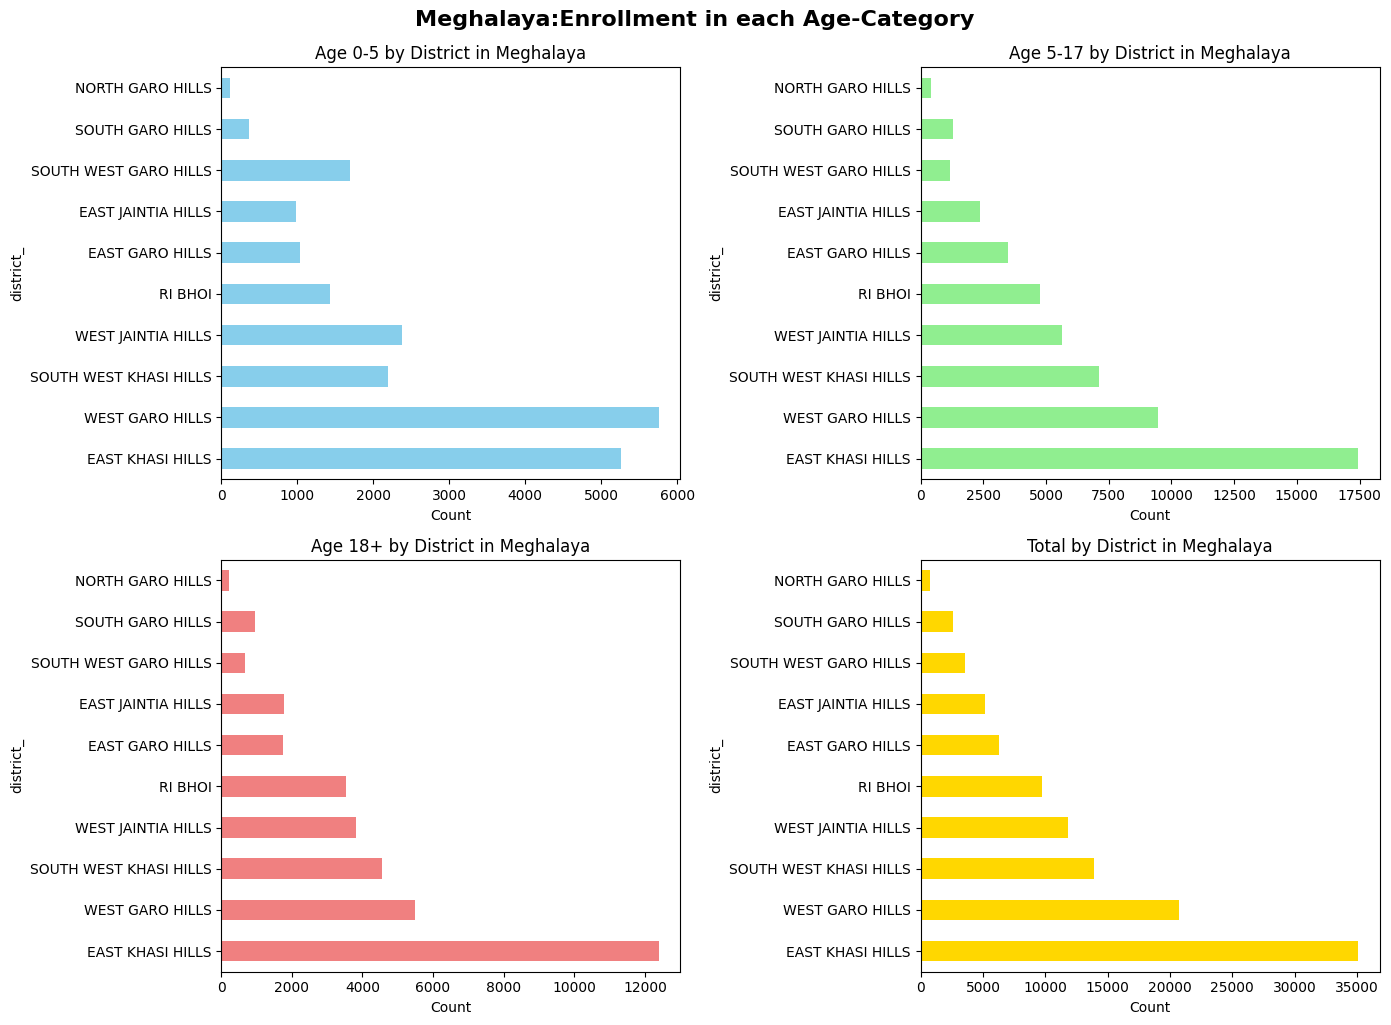

                        age_0_5  age_5_17  age_18_greater  total
district_                                                       
EAST KHASI HILLS           5267     17439           12386  35092
WEST GARO HILLS            5756      9464            5493  20713
SOUTH WEST KHASI HILLS     2193      7109            4568  13870
WEST JAINTIA HILLS         2385      5640            3809  11834
RI BHOI                    1437      4757            3526   9720
EAST GARO HILLS            1035      3493            1760   6288
EAST JAINTIA HILLS          984      2354            1790   5128
SOUTH WEST GARO HILLS      1698      1167             681   3546
SOUTH GARO HILLS            360      1297             965   2622
NORTH GARO HILLS            116       427             225    768


In [123]:
# Group Meghalaya by district and sum all age groups
mgh_district_grouped = meghalaya.groupby('district_')[['age_0_5', 'age_5_17', 'age_18_greater', 'total']].sum().sort_values('total', ascending=False)

# Create comparative bar graphs
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

mgh_district_grouped['age_0_5'].plot(kind='barh', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age 0-5 by District in Meghalaya')
axes[0, 0].set_xlabel('Count')

mgh_district_grouped['age_5_17'].plot(kind='barh', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Age 5-17 by District in Meghalaya')
axes[0, 1].set_xlabel('Count')

mgh_district_grouped['age_18_greater'].plot(kind='barh', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Age 18+ by District in Meghalaya')
axes[1, 0].set_xlabel('Count')

mgh_district_grouped['total'].plot(kind='barh', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Total by District in Meghalaya')
axes[1, 1].set_xlabel('Count')

plt.tight_layout()
fig.suptitle('Meghalaya:Enrollment in each Age-Category', fontsize=16, fontweight='bold', y=1.02)

plt.show()

print(mgh_district_grouped)

In [124]:
assam = df[df['state_']=="ASSAM"]
print(assam.shape)
assam = assam.drop(columns=['state_'])
print(assam.shape)
print(len(assam['district_'].unique()))


(31835, 11)
(31835, 10)
34


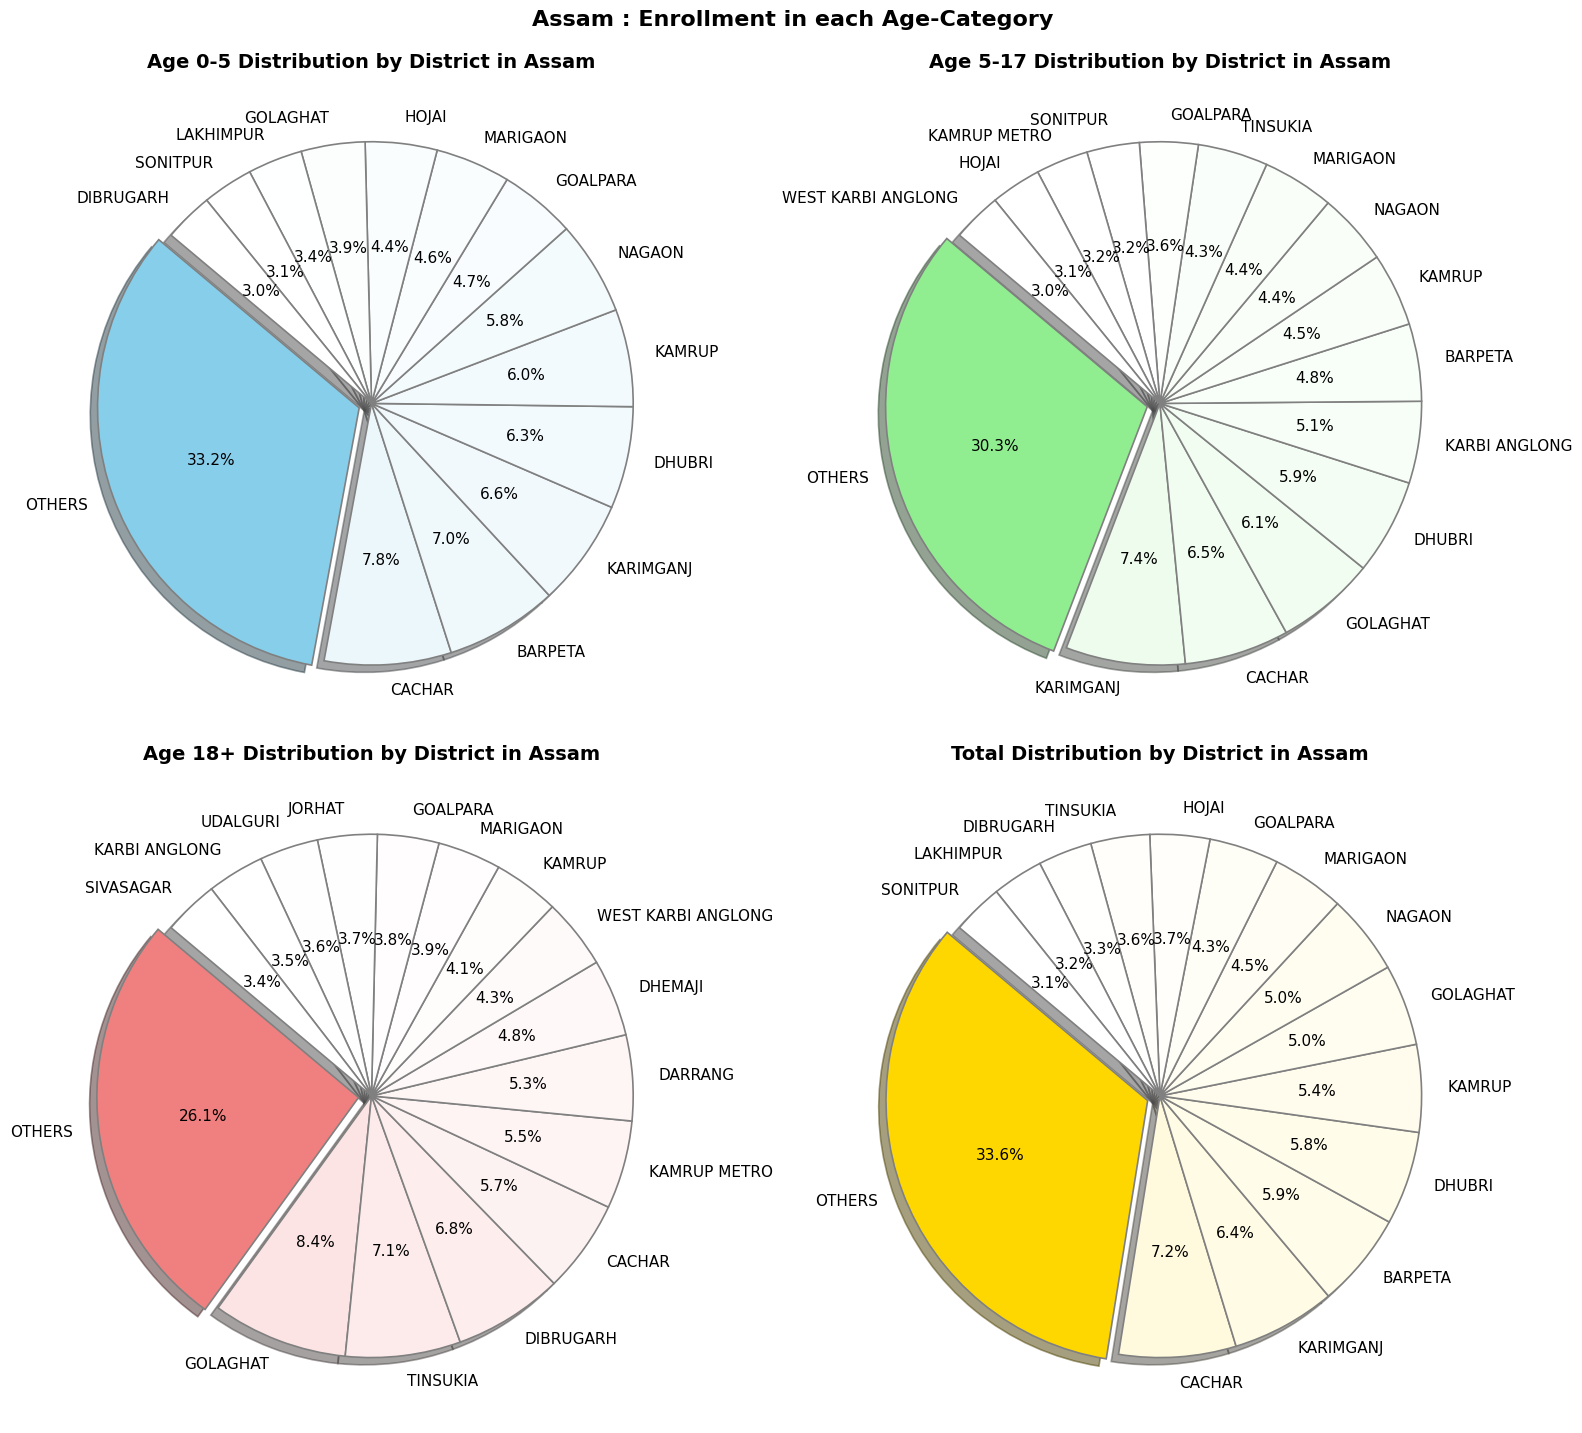

In [125]:

# Group Assam by district and sum all age groups
assam_district_grouped = assam.groupby('district_')[['age_0_5', 'age_5_17', 'age_18_greater', 'total']].sum().sort_values('total', ascending=False)

threshold_pct =3 # Values below 3% go to OTHERS

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for ax, col in zip(axes.flat, cols):
    values = assam_district_grouped[col]
    total_sum = values.sum()

    # Split major vs negligible
    major = values[values / total_sum * 100 >= threshold_pct]
    others = values[values / total_sum * 100 < threshold_pct].sum()
    if others > 0:
        major = pd.concat([major, pd.Series({'OTHERS': others})])

    major = major.sort_values(ascending=False)
    
    # Explode largest slice slightly
    explode = [0.05 if v == major.max() else 0 for v in major]

    # Gradient shading: darker = higher %, lighter = lower %
    norm = mcolors.Normalize(vmin=major.min(), vmax=major.max())
    cmap = mcolors.LinearSegmentedColormap.from_list('shade', ['white', base_colors[col]])
    colors = [cmap(norm(v)) for v in major]

    # Plot pie
    ax.pie(
        major.values,
        labels=major.index,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'gray', 'linewidth': 1.2},
        textprops={'fontsize': 11}
    )
    ax.set_title(f"{rename[col]} Distribution by District in Assam", fontsize=14, weight='bold')

plt.tight_layout()
fig.suptitle('Assam : Enrollment in each Age-Category', fontsize=16, fontweight='bold', y=1.02)

plt.show()


Analyzing For Delhi

In [126]:
delhi = df[df['state_']=="DELHI"]
print(delhi.shape)
delhi = delhi.drop(columns=['state_'])
print(delhi.shape)
print(len(delhi['district_'].unique()))

(6804, 11)
(6804, 10)
11


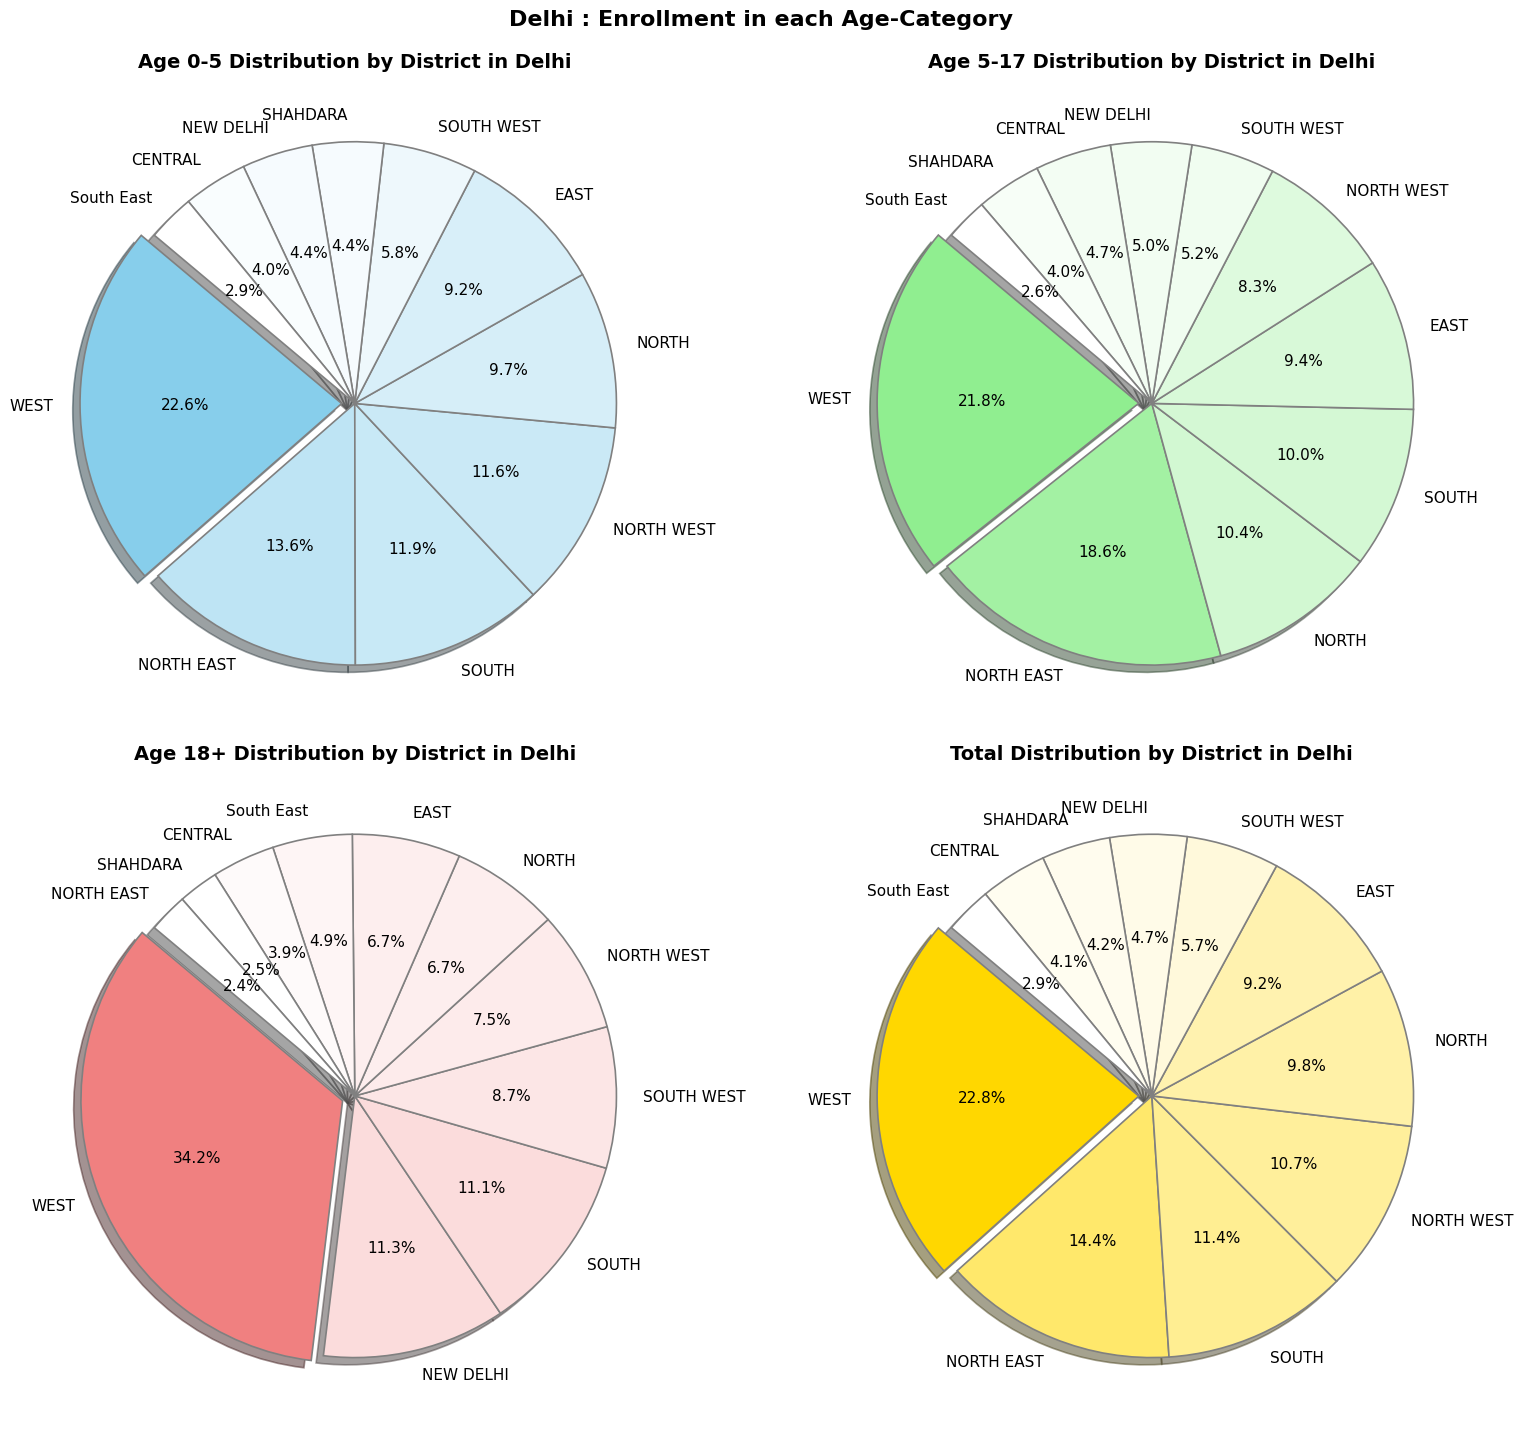

In [127]:
# Group Delhi by district and sum all age groups
delhi_district_grouped = delhi.groupby('district_')[['age_0_5', 'age_5_17', 'age_18_greater', 'total']].sum().sort_values('total', ascending=False)
threshold_pct = 2  # Values below 2% go to OTHERS

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for ax, col in zip(axes.flat, cols):
    values = delhi_district_grouped[col]
    total_sum = values.sum()

    # Split major vs negligible
    major = values[values / total_sum * 100 >= threshold_pct]
    others = values[values / total_sum * 100 < threshold_pct].sum()
    if others > 0:
        major = pd.concat([major, pd.Series({'OTHERS': others})])

    major = major.sort_values(ascending=False)
    
    # Explode largest slice slightly
    explode = [0.05 if v == major.max() else 0 for v in major]

    # Gradient shading: darker = higher %, lighter = lower %
    norm = mcolors.Normalize(vmin=major.min(), vmax=major.max())
    cmap = mcolors.LinearSegmentedColormap.from_list('shade', ['white', base_colors[col]])
    colors = [cmap(norm(v)) for v in major]

    # Plot pie
    ax.pie(
        major.values,
        labels=major.index,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'gray', 'linewidth': 1.2},
        textprops={'fontsize': 11}
    )
    ax.set_title(f"{rename[col]} Distribution by District in Delhi", fontsize=14, weight='bold')

plt.tight_layout()
fig.suptitle('Delhi : Enrollment in each Age-Category', fontsize=16, fontweight='bold', y=1.02)

plt.show()


NCR-Analysis

In [128]:
'''
Fetched NCR list from https://ncrpb.nic.in/ncrconstituent.html
'''
NCR = 'CENTRAL,EAST,NORTH,NORTH EAST,NORTH WEST,NEW DELHI,SOUTH,SOUTH EAST,SOUTH WEST,SHAHDARA,WEST,FARIDABAD,GURUGRAM,SONIPAT,PANIPAT,JHAJJAR,ROHTAK,REWARI,NUH,PALWAL,KURUKSHETRA,KAITHAL,KARNAL,AMBALA,PANCHKULA,GHAZIABAD,GAUTAM BUDDHA NAGAR,BULANDSHAHR,MEERUT,BAGHPAT,HAPUR,MUZAFFARNAGAR,SHAMLI,ALWAR,BHARATPUR'
ncr_states = set(['DELHI','UTTAR PRADESH','RAJASTHAN','HARYANA'])
ncr_districts = set(NCR.split(','))

In [129]:
# Filter data for NCR states and districts
ncr_df = df[(df['state_'].isin(ncr_states)) & (df['district_'].isin(ncr_districts))]
print(f'NCR dataframe shape: {ncr_df.shape}')
print(f'NCR states: {ncr_df["state_"].unique()}')
print(f'NCR districts count: {ncr_df["district_"].nunique()}')

NCR dataframe shape: (31220, 11)
NCR states: ['UTTAR PRADESH' 'HARYANA' 'DELHI' 'RAJASTHAN']
NCR districts count: 34


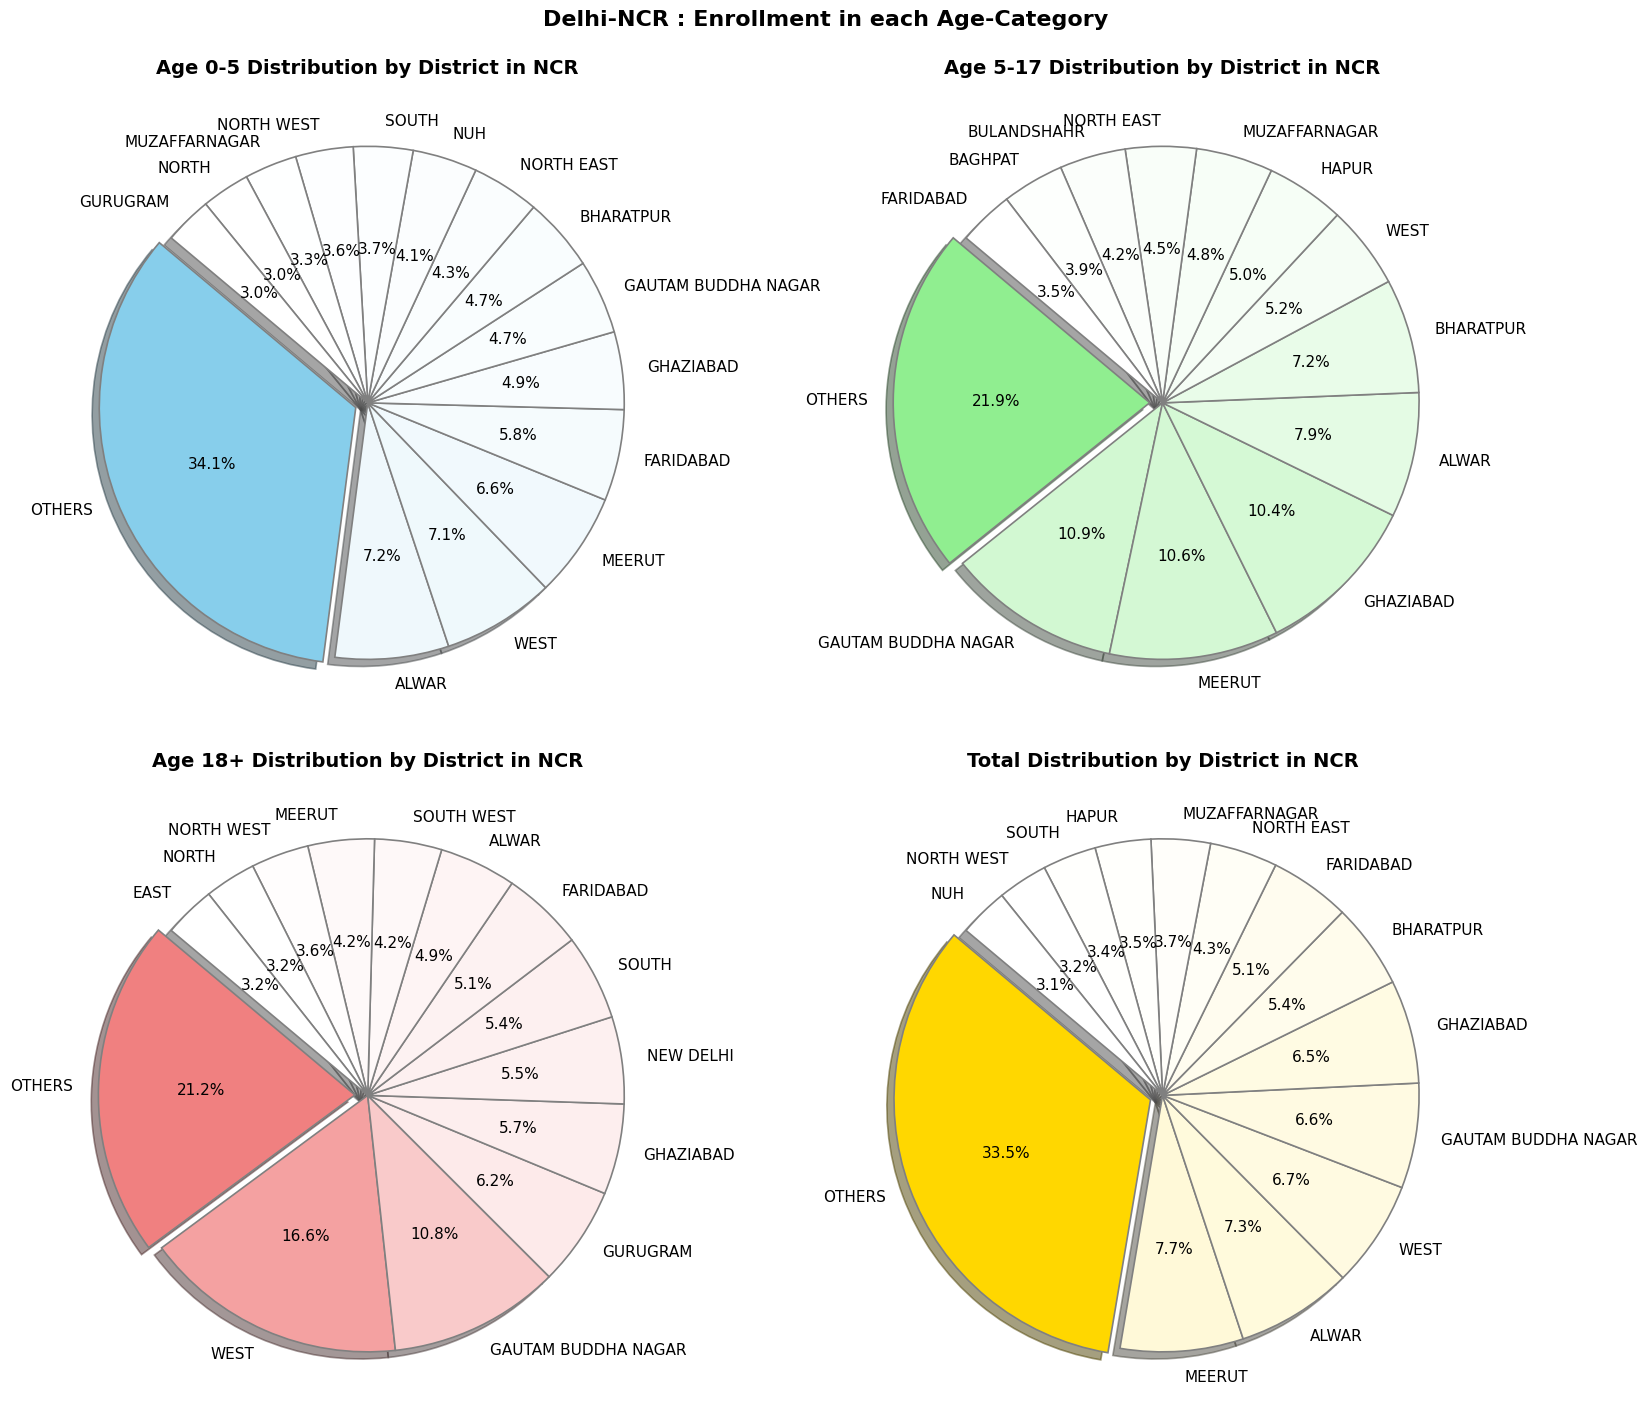

In [130]:
# Group NCR by district and sum all age groups
ncr_district_grouped = ncr_df.groupby('district_')[['age_0_5', 'age_5_17', 'age_18_greater', 'total']].sum().sort_values('total', ascending=False)

threshold_pct = 3  # Values below 3% go to OTHERS

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for ax, col in zip(axes.flat, cols):
    values = ncr_district_grouped[col]
    total_sum = values.sum()

    # Split major vs negligible
    major = values[values / total_sum * 100 >= threshold_pct]
    others = values[values / total_sum * 100 < threshold_pct].sum()
    if others > 0:
        major = pd.concat([major, pd.Series({'OTHERS': others})])

    major = major.sort_values(ascending=False)
    
    # Explode largest slice slightly
    explode = [0.05 if v == major.max() else 0 for v in major]

    # Gradient shading: darker = higher %, lighter = lower %
    norm = mcolors.Normalize(vmin=major.min(), vmax=major.max())
    cmap = mcolors.LinearSegmentedColormap.from_list('shade', ['white', base_colors[col]])
    colors = [cmap(norm(v)) for v in major]

    # Plot pie
    ax.pie(
        major.values,
        labels=major.index,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'gray', 'linewidth': 1.2},
        textprops={'fontsize': 11}
    )
    ax.set_title(f"{rename[col]} Distribution by District in NCR", fontsize=14, weight='bold')

plt.tight_layout()
fig.suptitle('Delhi-NCR : Enrollment in each Age-Category', fontsize=16, fontweight='bold', y=1.02)
plt.show()

Region-Wise grouping

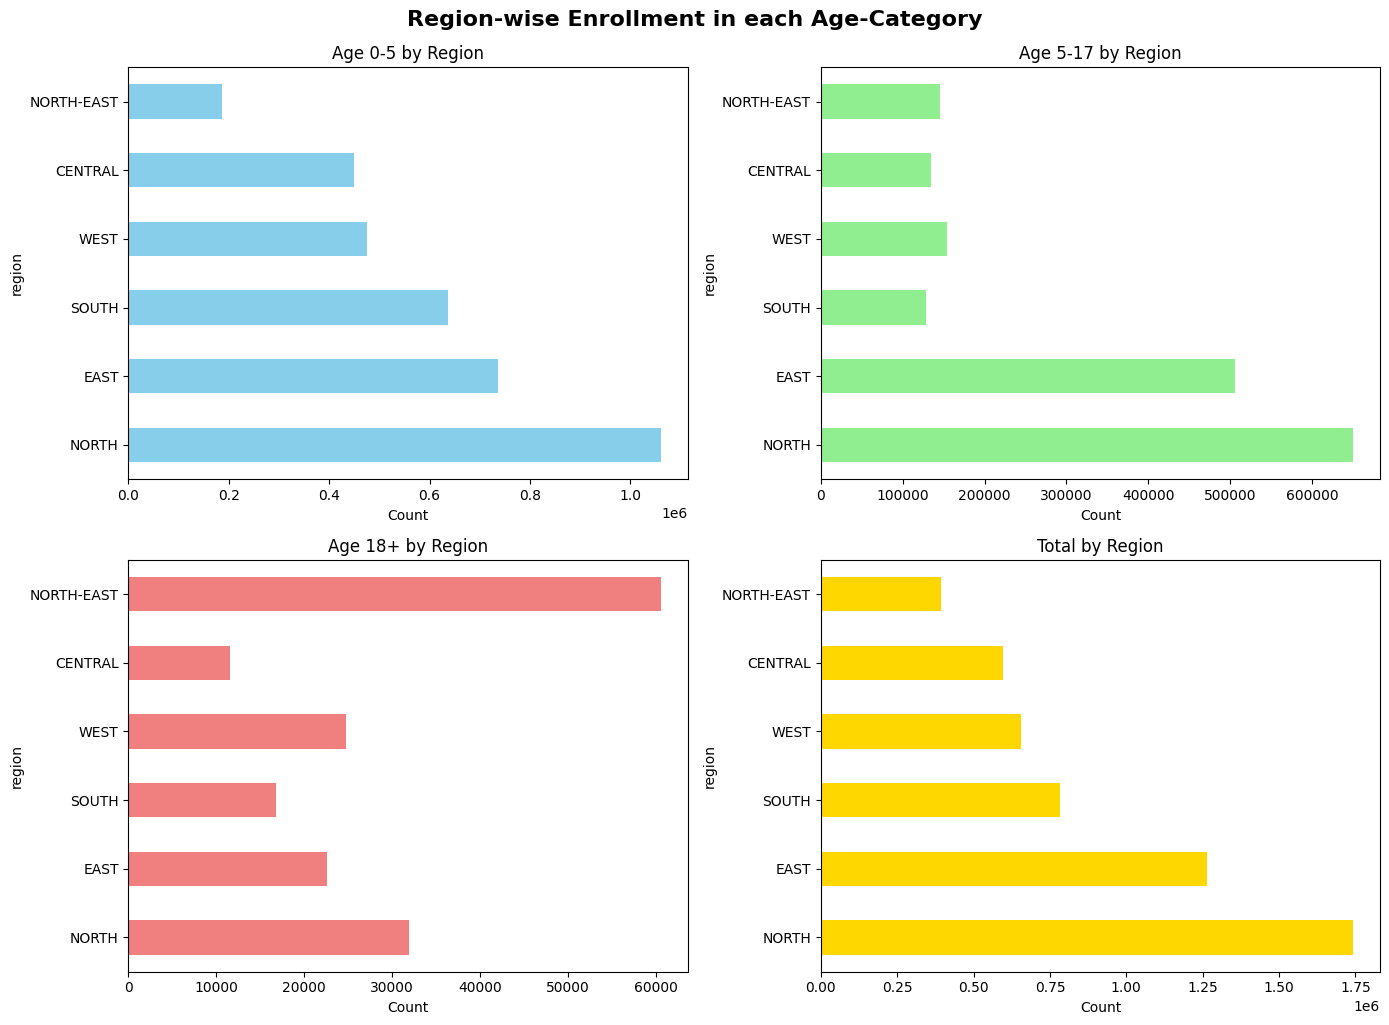

            age_0_5  age_5_17  age_18_greater    total
region                                                
NORTH       1060958    650771           31888  1743617
EAST         736277    506566           22605  1265448
SOUTH        637597    128513           16730   782840
WEST         475258    153802           24760   653820
CENTRAL      450443    135150           11596   597189
NORTH-EAST   186432    145581           60557   392570


In [131]:
# Group by region and sum all age groups
region_grouped = df.groupby('region')[['age_0_5', 'age_5_17', 'age_18_greater', 'total']].sum().sort_values('total', ascending=False)

# Create comparative bar graphs
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

region_grouped['age_0_5'].plot(kind='barh', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age 0-5 by Region')
axes[0, 0].set_xlabel('Count')

region_grouped['age_5_17'].plot(kind='barh', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Age 5-17 by Region')
axes[0, 1].set_xlabel('Count')

region_grouped['age_18_greater'].plot(kind='barh', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Age 18+ by Region')
axes[1, 0].set_xlabel('Count')

region_grouped['total'].plot(kind='barh', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Total by Region')
axes[1, 1].set_xlabel('Count')

plt.tight_layout()
fig.suptitle('Region-wise Enrollment in each Age-Category', fontsize=16, fontweight='bold', y=1.02)

plt.show()

print(region_grouped)

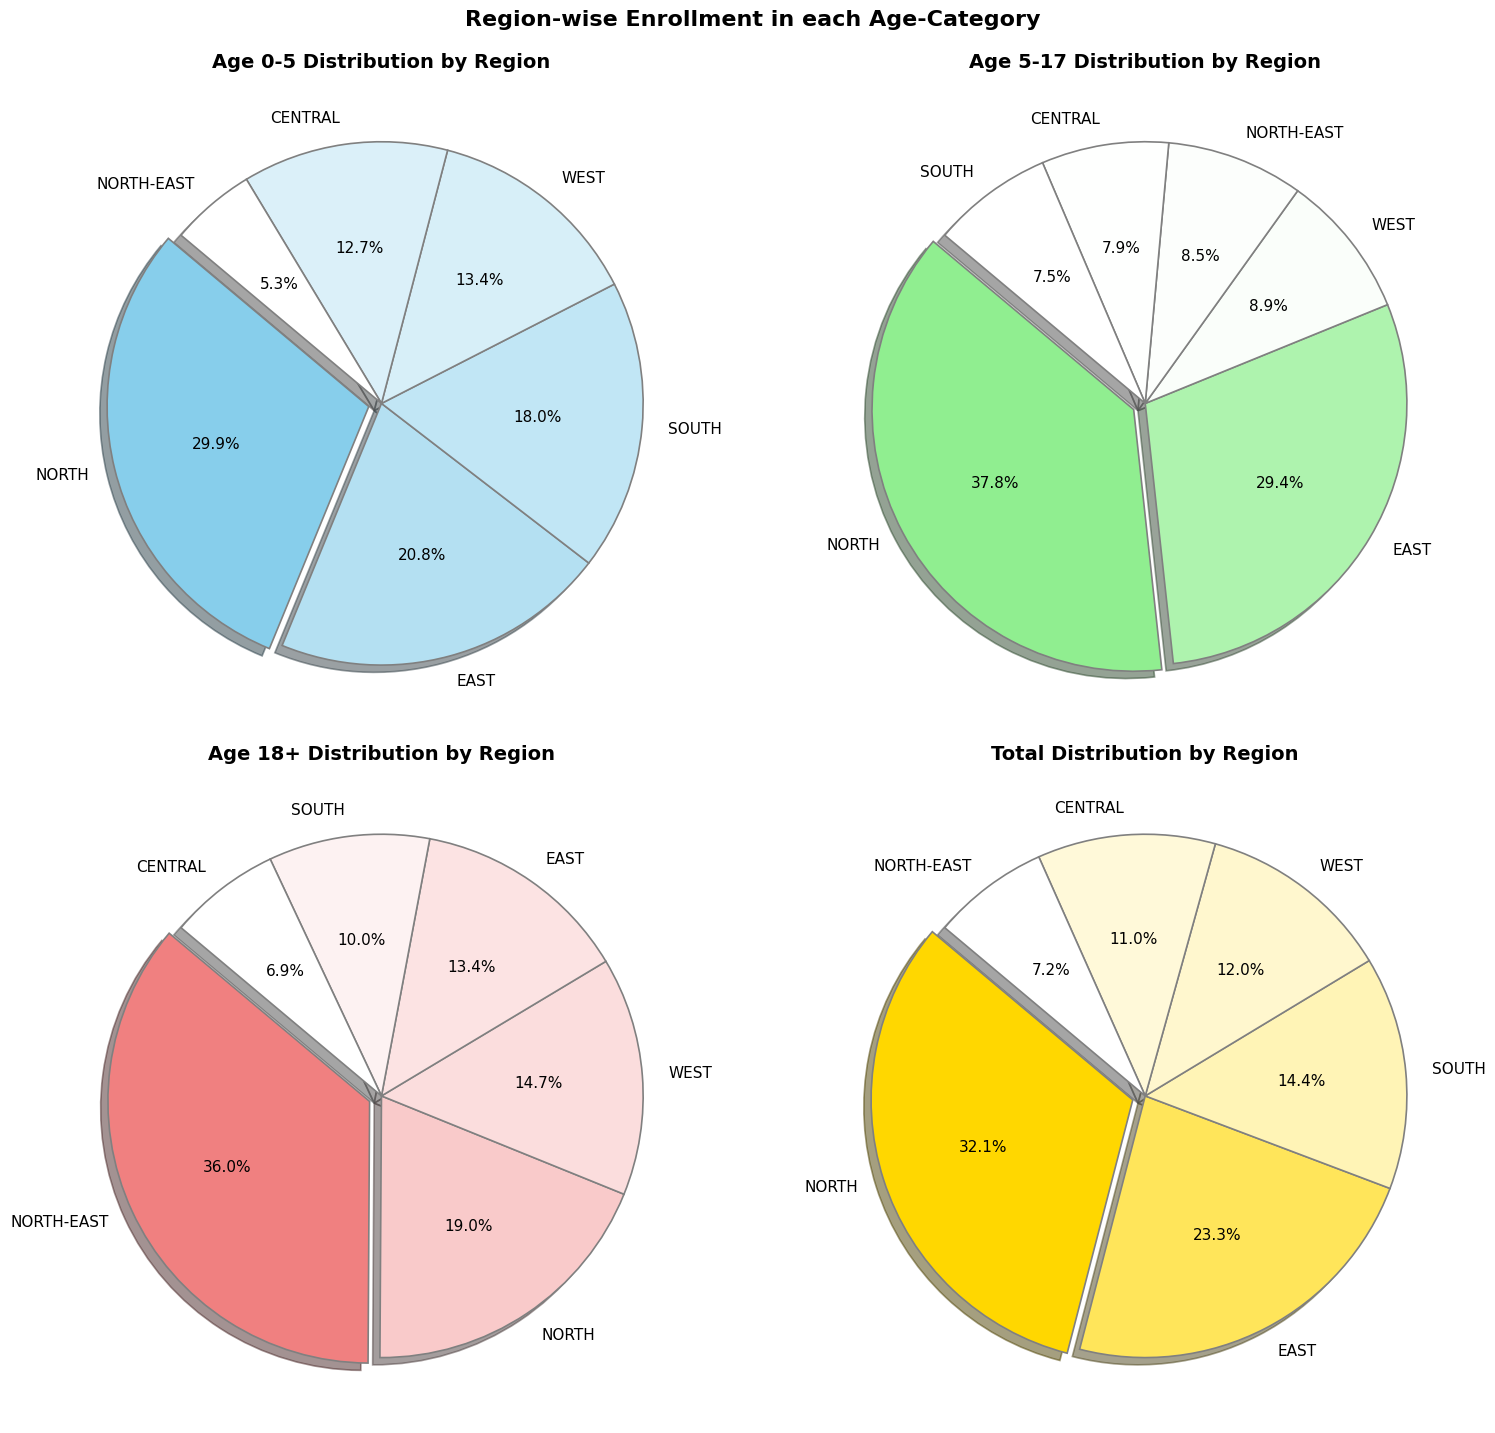

In [132]:
threshold_pct = 2  # Values below 2% go to OTHERS

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for ax, col in zip(axes.flat, cols):
    values = region_grouped[col]
    total_sum = values.sum()

    # Split major vs negligible
    major = values[values / total_sum * 100 >= threshold_pct]
    others = values[values / total_sum * 100 < threshold_pct].sum()
    if others > 0:
        major = pd.concat([major, pd.Series({'OTHERS': others})])

    major = major.sort_values(ascending=False)
    
    # Explode largest slice slightly
    explode = [0.05 if v == major.max() else 0 for v in major]

    # Gradient shading: darker = higher %, lighter = lower %
    norm = mcolors.Normalize(vmin=major.min(), vmax=major.max())
    cmap = mcolors.LinearSegmentedColormap.from_list('shade', ['white', base_colors[col]])
    colors = [cmap(norm(v)) for v in major]

    # Plot pie
    ax.pie(
        major.values,
        labels=major.index,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'gray', 'linewidth': 1.2},
        textprops={'fontsize': 11}
    )
    ax.set_title(f"{rename[col]} Distribution by Region", fontsize=14, weight='bold')

plt.tight_layout()
fig.suptitle('Region-wise Enrollment in each Age-Category', fontsize=16, fontweight='bold', y=1.02)
plt.show()
